In [1]:
%pip install -qq -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import geopandas as gpd
from datasets_tourism import *
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import branca
import numpy as np
import networkx as nx
from shapely.geometry import Point, LineString
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
import pyrosm 
import contextily as cx
pd.options.mode.chained_assignment = None  # default='warn'

> 2024-06-16 21:36:56,271 [info] Project loaded successfully: {'project_name': 'overtourism'}


# Timeframe giugno - settembre 2023 

In [3]:
START_DATE = "2023-07-01"
END_DATE = "2023-08-31"
SPECIFIC_DAY = "2023-07-29"

In [4]:
contamezzi_df

,data,sensore,direzione,comune,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato
0,2023-06-29 09:00:00,M40,1,MOLVENO,76,16,1,1,2,0,0,1
1,2023-06-29 09:00:00,M40,2,MOLVENO,53,12,4,0,2,0,0,3
2,2023-06-29 10:00:00,M40,1,MOLVENO,166,44,5,3,4,1,0,2
3,2023-06-29 10:00:00,M40,2,MOLVENO,116,31,5,6,1,0,0,6
4,2023-06-29 11:00:00,M40,1,MOLVENO,147,38,4,8,3,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
13821,2023-10-04 21:00:00,M47,2,MOLVENO,11,0,0,0,0,0,0,0
13822,2023-10-04 22:00:00,M47,1,MOLVENO,1,2,0,0,0,0,0,0
13823,2023-10-04 22:00:00,M47,2,MOLVENO,3,0,0,0,0,0,0,0
13824,2023-10-04 23:00:00,M47,1,MOLVENO,4,1,0,0,0,0,0,0


# Parcheggi 

In [5]:
statistiche_parcheggi_molveno_df["date"] = pd.to_datetime(statistiche_parcheggi_molveno_df["date"])
statistiche_parcheggi_molveno_df

,20 MIN,40 MIN,1 ORA,1 ORA E 20 MIN,1 ORA E 40 MIN,2 ORE,3 ORE,4 ORE,5 ORE,6 ORE,...,1 GIORNO,2 GIORNI,3 GIORNI,4 GIORNI,5 GIORNI,6 GIORNI,7 GIORNI,8 GIORNI,TOTALE,date
0,1.0,3.0,3.0,9.0,6.0,4.0,12.0,8.0,7.0,13.0,...,0.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,99.0,2022-07-27
1,1.0,4.0,5.0,4.0,10.0,14.0,35.0,23.0,22.0,21.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,156.0,2022-07-28
2,1.0,2.0,8.0,7.0,10.0,16.0,38.0,21.0,13.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142.0,2022-07-29
3,5.0,15.0,21.0,23.0,35.0,22.0,107.0,83.0,85.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,604.0,2022-07-30
4,8.0,11.0,24.0,39.0,45.0,34.0,123.0,121.0,141.0,140.0,...,3.0,8.0,2.0,1.0,0.0,0.0,0.0,0.0,1056.0,2022-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0.0,2.0,1.0,1.0,0.0,1.0,1.0,3.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2023-09-27
428,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2023-09-28
429,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,2.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,2023-09-29
430,0.0,4.0,2.0,7.0,5.0,4.0,9.0,13.0,6.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,2023-09-30


### Visualize data within the specific timeframe

In [6]:
statistiche_parcheggi_molveno_timeframe_df = statistiche_parcheggi_molveno_df[
    (statistiche_parcheggi_molveno_df["date"] >= START_DATE) & 
    (statistiche_parcheggi_molveno_df["date"] <= END_DATE)
]

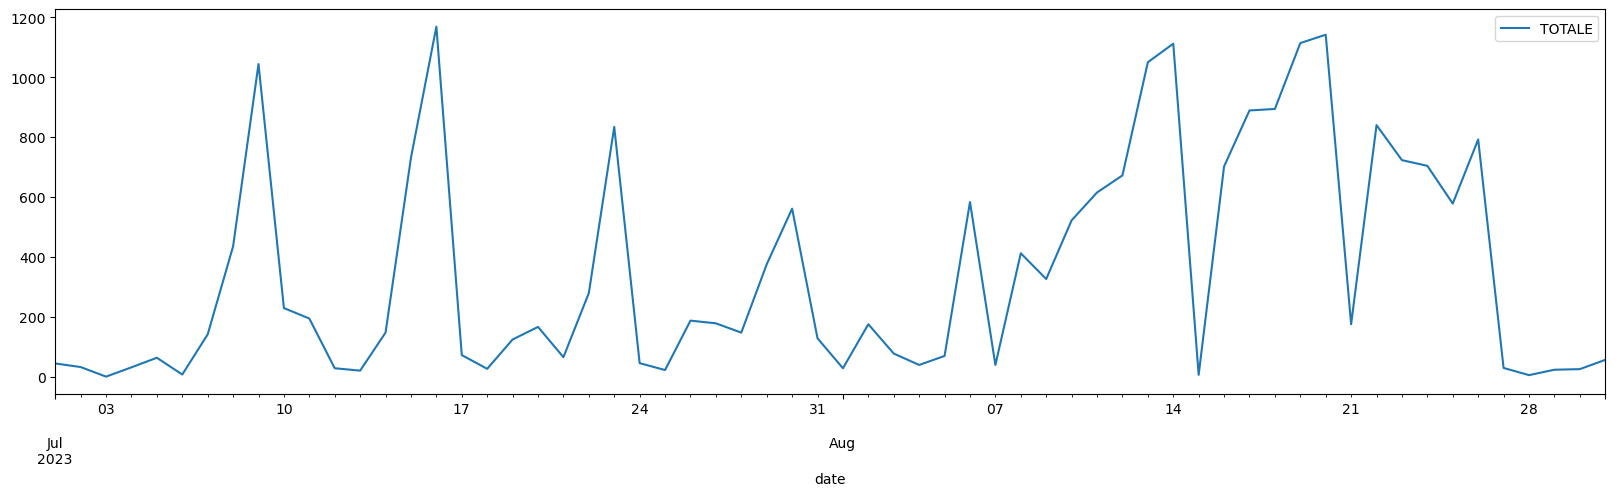

In [7]:
statistiche_parcheggi_molveno_timeframe_df.plot(y=["TOTALE"], x="date", figsize=(20,5))
plt.show()

# Dati Vodafone

## Vodafone Aree

In [8]:
vodafone_aree_df

,locId,locName,locType,locDescr
0,22,provincia,AL_2,Trentino
1,100,apt,TN_MKT_AM_22,"San Martino Di Castrozza, Primiero e Vanoi"
2,101,apt,TN_MKT_AM_22,Valle di Non
3,102,apt,TN_MKT_AM_22,"Rovereto, Vallagarina e Monte Baldo"
4,103,apt,TN_MKT_AM_22,Valle di Fassa
...,...,...,...,...
148,LAGO_CAPR,poi,TN_MKT_POI,Lago dei Caprioli
149,MADO_CAMP,poi,TN_MKT_POI,Madonna di Campiglio
150,PINZ_REND,poi,TN_MKT_POI,Pinzolo e Rendena
151,STAZ_ROVE,poi,TN_MKT_POI,Stazione di Trento


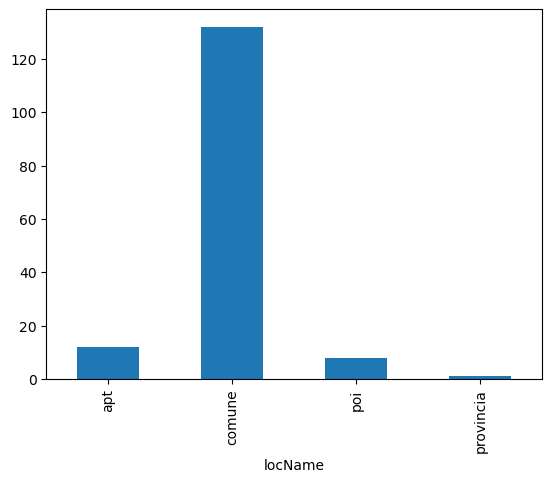

In [9]:
vodafone_aree_df.groupby("locName")["locId"].count().plot(kind="bar")
plt.show()

## Vodafone Attendances

In [10]:
LOC_ID_LAGO_MOLVENO = "LAGO_MOLV"
LOC_ID_MOLVENO = "27"
LOC_ID_APT_MOLVENO = "105"

attendances_timeframe_df = vodafone_attendences_df[
    (vodafone_attendences_df["date"] >= START_DATE) &
    (vodafone_attendences_df["date"] <= END_DATE) &
    (vodafone_attendences_df["value"] != 0) &
    (vodafone_attendences_df["locId"] == LOC_ID_APT_MOLVENO)
]
attendances_timeframe_df

,date,locType,locId,userCountry,userProfile,userCluster,value
2980720,2023-07-01,TN_MKT_AM_22,105,ALB,TOURIST,None,137
2980726,2023-07-01,TN_MKT_AM_22,105,AUT,TOURIST,A,180
2980727,2023-07-01,TN_MKT_AM_22,105,AUT,VISITOR,A,119
2980728,2023-07-01,TN_MKT_AM_22,105,BEL,TOURIST,B,43
2980739,2023-07-01,TN_MKT_AM_22,105,CHE,TOURIST,CH,43
...,...,...,...,...,...,...,...
3429070,2023-08-31,TN_MKT_AM_22,105,ROU,VISITOR,UE,72
3429076,2023-08-31,TN_MKT_AM_22,105,SRB,TOURIST,UE,29
3429080,2023-08-31,TN_MKT_AM_22,105,SVN,TOURIST,UE,22
3429082,2023-08-31,TN_MKT_AM_22,105,SWE,TOURIST,UE,22


In [11]:

attendances_timeframe_df["date"] = pd.to_datetime(attendances_timeframe_df["date"])

attendances_timeframe_df = attendances_timeframe_df.assign(
    year=attendances_timeframe_df["date"].dt.year,
    month=attendances_timeframe_df["date"].dt.month,
    day=attendances_timeframe_df["date"].dt.day
)


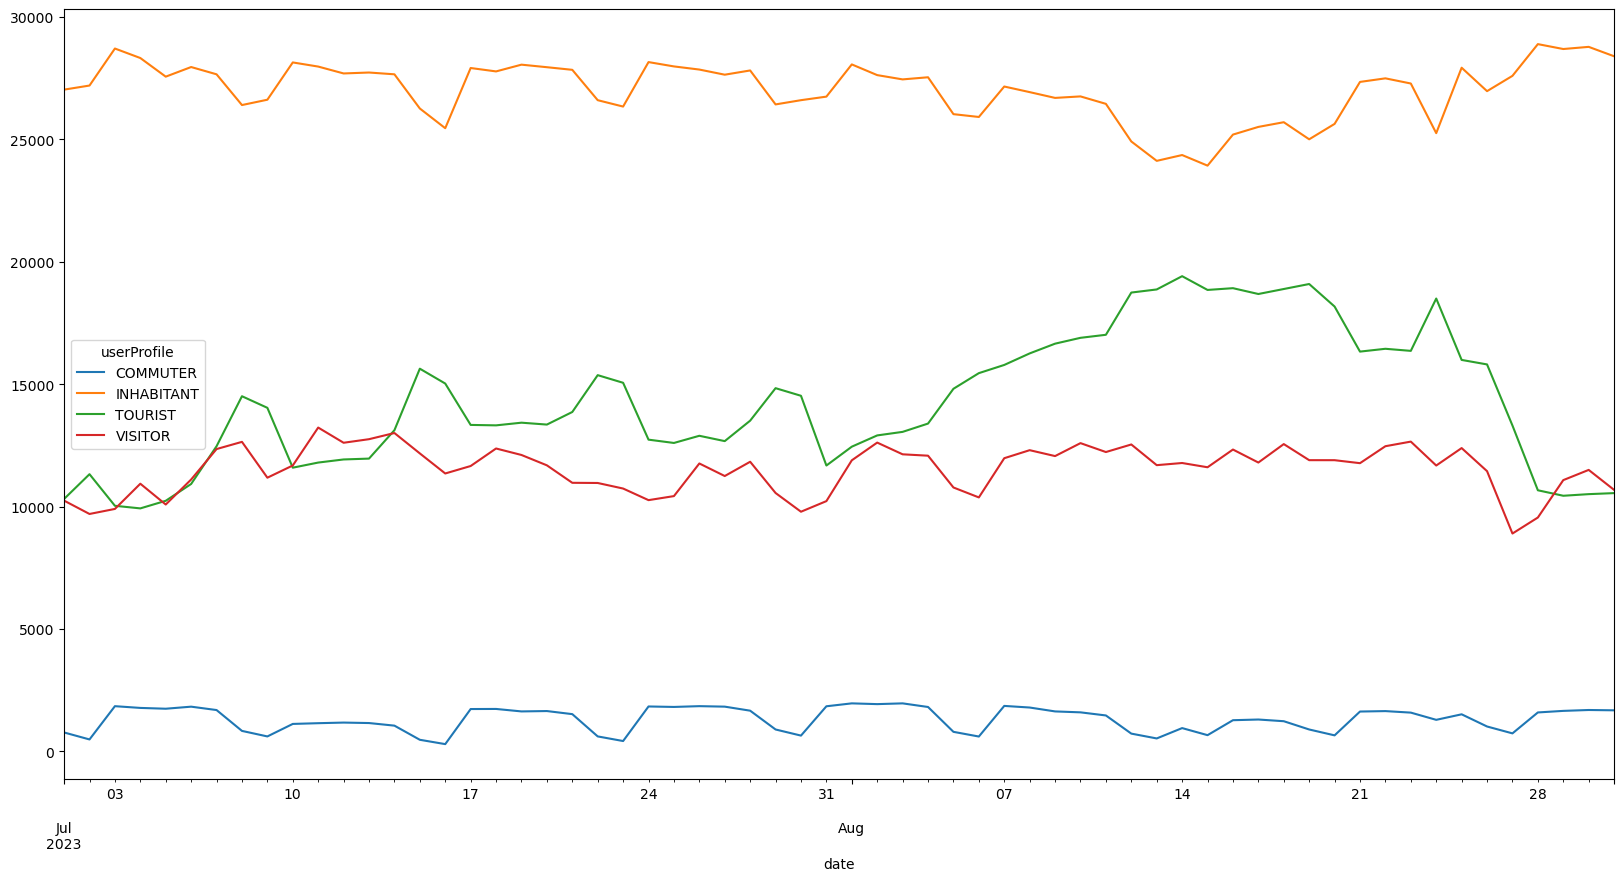

In [12]:
attendances_timeframe_df.groupby(["date", "userProfile"]).sum().unstack().plot(y="value", figsize=(20, 10))
plt.show()

### Correlation vodafone grouped by userProfile and  parcheggi 

In [13]:
attendances_timeframe_df.groupby(["date", "userProfile"])[["value"]].sum()

value
date       userProfile       
2023-07-01 COMMUTER       772
           INHABITANT   27033
           TOURIST      10312
           VISITOR      10243
2023-07-02 COMMUTER       487
...                       ...
2023-08-30 VISITOR      11498
2023-08-31 COMMUTER      1677
           INHABITANT   28396
           TOURIST      10550
           VISITOR      10682

[248 rows x 1 columns]

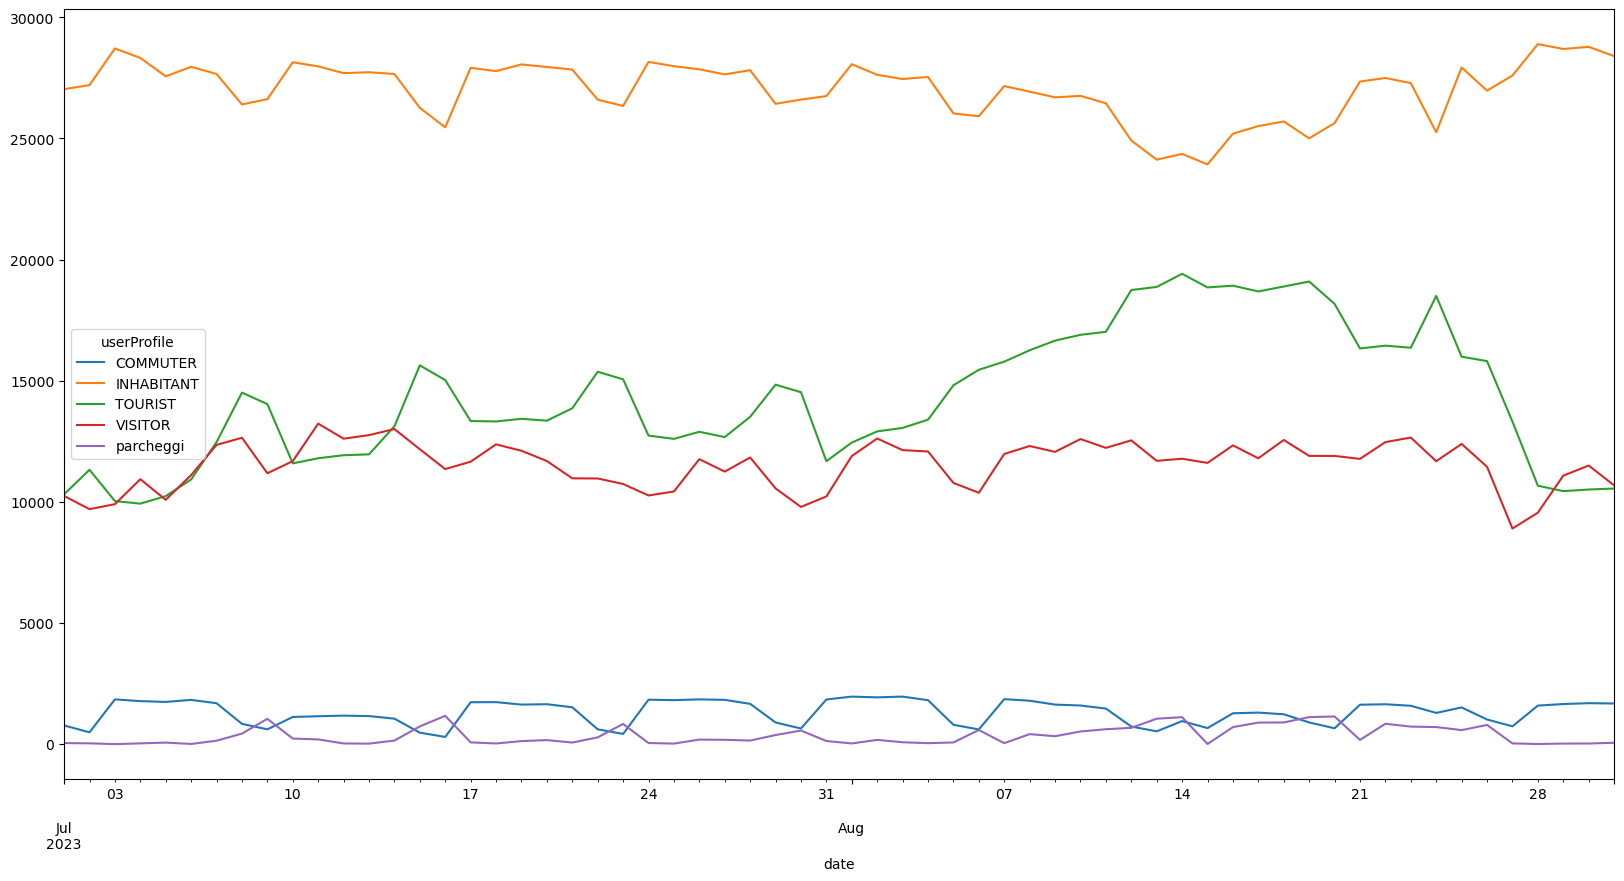

In [14]:
ax = attendances_timeframe_df.groupby(["date", "userProfile"])[["value"]].sum().unstack().plot(y="value", figsize=(20, 10))
statistiche_parcheggi_molveno_timeframe_df[["TOTALE", "date"]].plot(ax=ax, y="TOTALE", x="date", label="parcheggi")
plt.show()

## Vodafone Attendances stranieri

In [15]:
vodafone_attendences_STR_df["date"] = pd.to_datetime(vodafone_attendences_STR_df["date"])
vodafone_attendences_STR_df["year"] = vodafone_attendences_STR_df["date"].dt.year
vodafone_attendences_STR_df["month"] = vodafone_attendences_STR_df["date"].dt.month
vodafone_attendences_STR_df["day"] = vodafone_attendences_STR_df["date"].dt.day
vodafone_attendences_STR_df.dtypes

date           datetime64[ns]
locType                object
locId                  object
userCountry            object
userProfile            object
userCluster            object
value                   int64
year                    int32
month                   int32
day                     int32
dtype: object

In [16]:
attendances_str_timeframe_df = vodafone_attendences_STR_df[
    (vodafone_attendences_STR_df["date"] >= START_DATE) &
    (vodafone_attendences_STR_df["date"] <= END_DATE)
]
attendances_str_timeframe_df

,date,locType,locId,userCountry,userProfile,userCluster,value,year,month,day
201501,2023-07-01,AL_2,22,STR,COMMUTER,STR,917,2023,7,1
201502,2023-07-01,AL_2,22,STR,TOURIST,STR,68707,2023,7,1
201503,2023-07-01,AL_2,22,STR,VISITOR,STR,41567,2023,7,1
201504,2023-07-01,TN_MKT_AL_3,104,STR,TOURIST,STR,22,2023,7,1
201505,2023-07-01,TN_MKT_AL_3,104,STR,VISITOR,STR,0,2023,7,1
...,...,...,...,...,...,...,...,...,...,...
226115,2023-08-31,TN_MKT_POI,STAZ_ROVE,STR,TOURIST,STR,23,2023,8,31
226116,2023-08-31,TN_MKT_POI,STAZ_ROVE,STR,VISITOR,STR,159,2023,8,31
226117,2023-08-31,TN_MKT_POI,STAZ_TREN,STR,COMMUTER,STR,0,2023,8,31
226118,2023-08-31,TN_MKT_POI,STAZ_TREN,STR,TOURIST,STR,94,2023,8,31


In [17]:
attendances_str_timeframe_df[attendances_str_timeframe_df["date"] == "2023-06-01"]

,date,locType,locId,userCountry,userProfile,userCluster,value,year,month,day


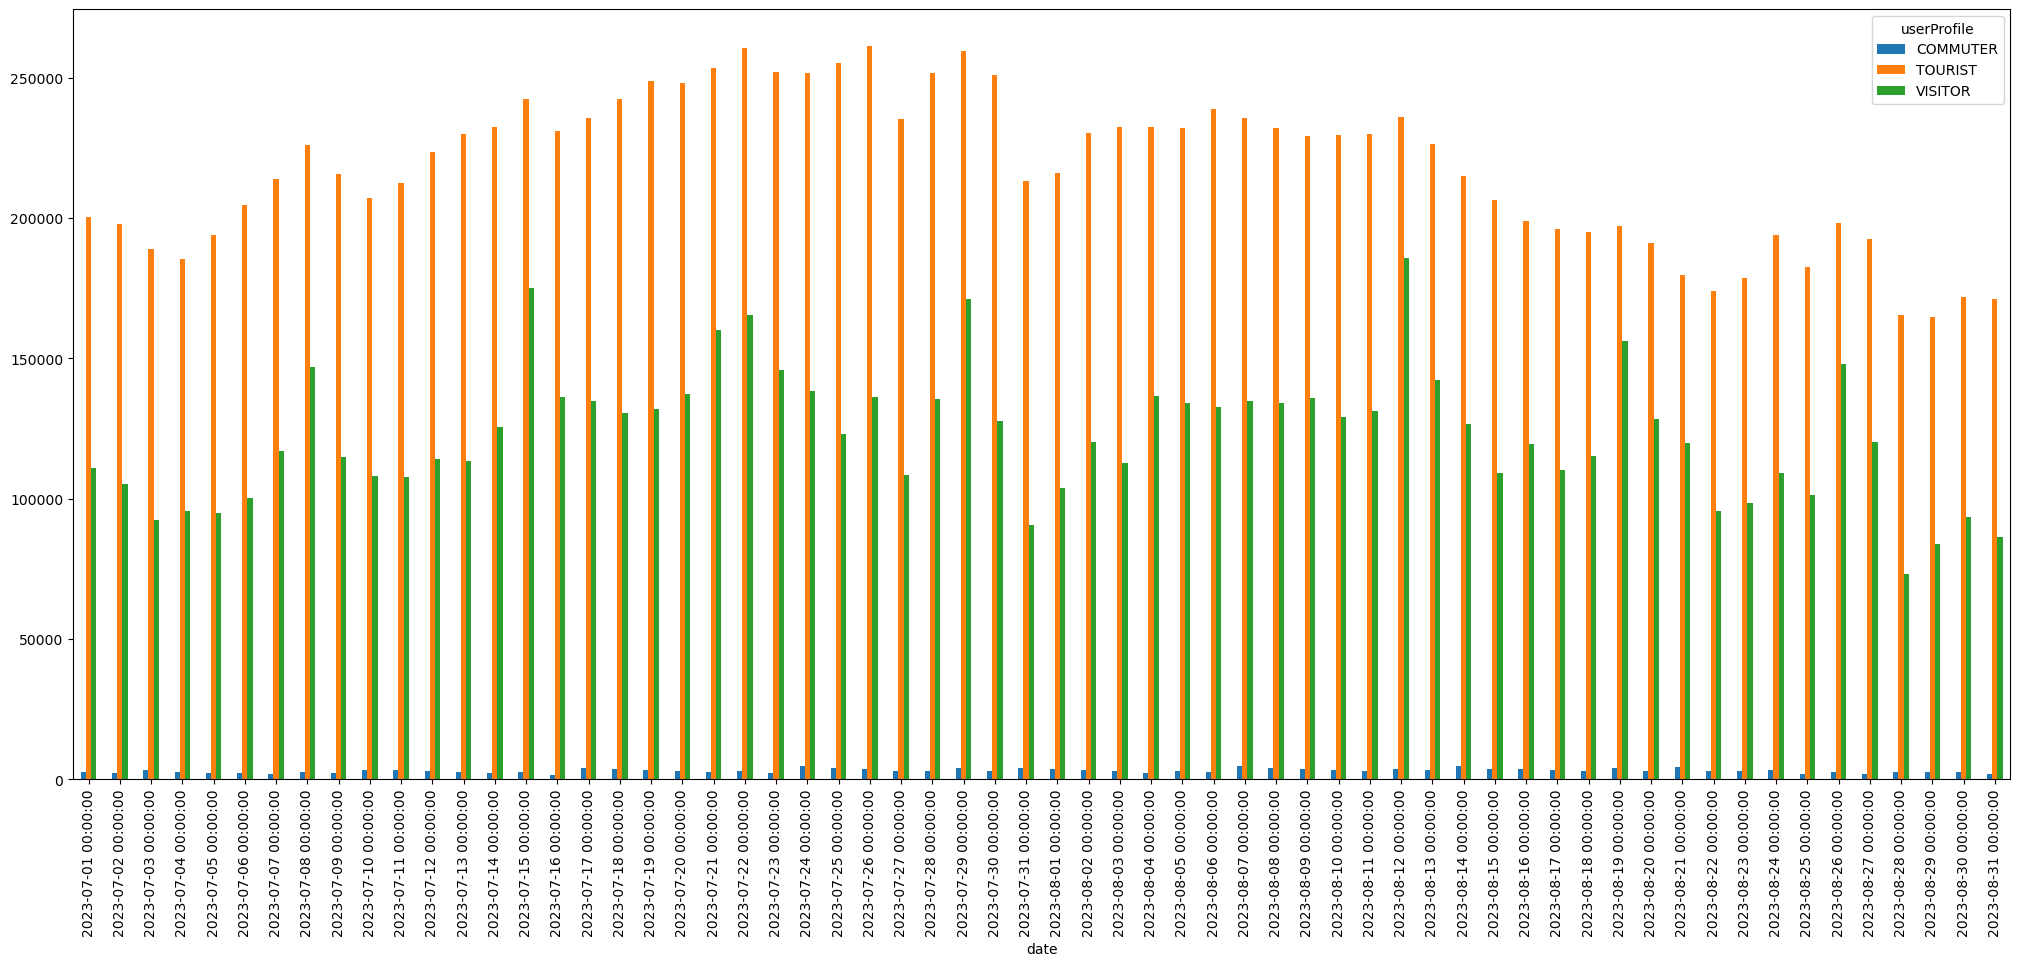

In [18]:
attendances_str_timeframe_df.groupby(["date", "userProfile"])["value"].sum().unstack().plot.bar(figsize=(25, 10))
plt.show()

# Contapersone passaggi

In [23]:
geolocation_varchi = pd.DataFrame(
    columns=["varco", "latitudine", "longitudine"],
    data=[{"varco": "varco_1", "latitudine": "46.13924236567406", "longitudine": "10.961895576518137"},
         {"varco": "varco_2", "latitudine": "46.139190391021934", "longitudine": "10.962781033089087"},
         {"varco": "varco_3", "latitudine": "46.13933300881043", "longitudine": "10.963293308705266"},
         {"varco": "varco_4", "latitudine": "46.13915716333343", "longitudine": "10.960657730824444"},
         {"varco": "varco_5", "latitudine": "46.137142430556146", "longitudine": "10.959695218117497"},
         {"varco": "varco_6", "latitudine": "46.136076920220255", "longitudine": "10.957716510620147"},
         {"varco": "varco_7", "latitudine": "46.13979765996494", "longitudine": "10.964046872037086"},
         {"varco": "varco_8", "latitudine": "46.13949280016543", "longitudine": "10.96488308558095"},
         {"varco": "varco_9", "latitudine": "46.14091074431774", "longitudine": "10.967884654712714"}]
)

In [24]:
geolocation_varchi = gpd.GeoDataFrame(
    geolocation_varchi,
    crs="epsg:4326",
    geometry=gpd.points_from_xy(\
            geolocation_varchi.longitudine,
            geolocation_varchi.latitudine)
)

In [25]:
geolocation_varchi.explore(marker_kwds={"color": "green", "radius": "3"})

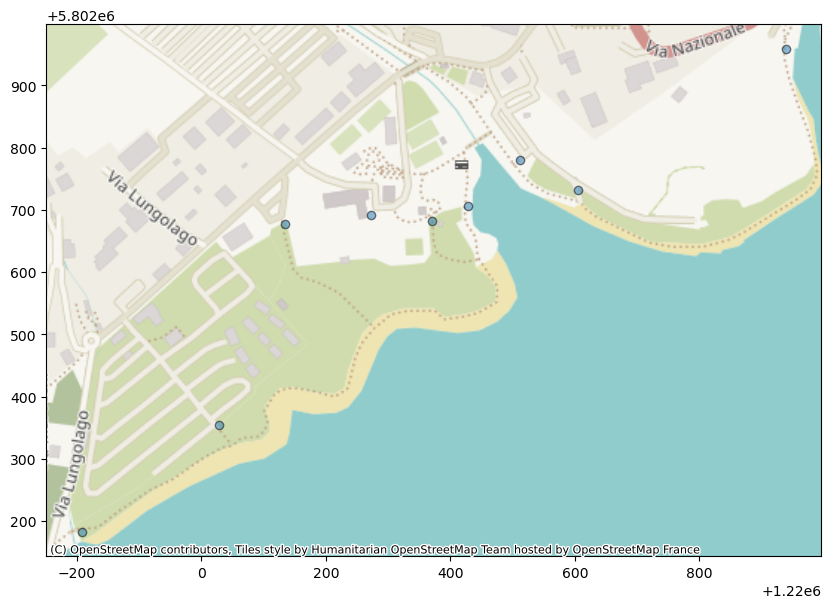

In [29]:
ax = geolocation_varchi.to_crs(epsg=3857).plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax)

In [30]:
# map_molveno = folium.Map(location=[46.13924236567406, 10.961895576518137], tiles="OpenStreetMap", zoom_start=16)
# for index, location_info in goelocation_varchi.iterrows():
#     folium.Marker([location_info["latitudine"], location_info["longitudine"]], popup=location_info["varco"]).add_to(map_molveno)
# map_molveno

In [31]:
file_path = 'molveno.pbf'
url = 'https://osmit-estratti.wmcloud.org/output/pbf/comuni/022120_Molveno.osm.pbf'
import urllib.request

# download the file
urllib.request.urlretrieve(url, file_path)


geolocation_varchi = pd.DataFrame(
    columns=["varco", "latitudine", "longitudine"],
    data=[{"varco": "varco_1", "latitudine": "46.13924236567406", "longitudine": "10.961895576518137"},
         {"varco": "varco_2", "latitudine": "46.139190391021934", "longitudine": "10.962781033089087"},
         {"varco": "varco_3", "latitudine": "46.13933300881043", "longitudine": "10.963293308705266"},
         {"varco": "varco_4", "latitudine": "46.13915716333343", "longitudine": "10.960657730824444"},
         {"varco": "varco_5", "latitudine": "46.137142430556146", "longitudine": "10.959695218117497"},
         {"varco": "varco_6", "latitudine": "46.136076920220255", "longitudine": "10.957716510620147"},
         {"varco": "varco_7", "latitudine": "46.13979765996494", "longitudine": "10.964046872037086"},
         {"varco": "varco_8", "latitudine": "46.13949280016543", "longitudine": "10.96488308558095"},
         {"varco": "varco_9", "latitudine": "46.14091074431774", "longitudine": "10.967884654712714"}]
)
geolocation_varchi = gpd.GeoDataFrame(
    geolocation_varchi,
    crs="epsg:4326",
    geometry=gpd.points_from_xy(\
            geolocation_varchi.longitudine,
            geolocation_varchi.latitudine)
)



In [32]:
osm = pyrosm.OSM(file_path)
nodes, edges = osm.get_network(nodes=True, network_type="all")

# Create a graph from the OSM data
G = osm.to_graph(nodes, edges, graph_type="networkx")

In [33]:
# Function to find the nearest edge and add node
def add_node_to_graph(graph, point):
    x, y = point.x, point.y
    nearest_edge = None
    min_dist = float("inf")
    nearest_point = None

    # Find the nearest edge to the point
    for u, v, data in graph.edges(data=True):
        line = LineString([Point(graph.nodes[u]['x'], graph.nodes[u]['y']),
                           Point(graph.nodes[v]['x'], graph.nodes[v]['y'])])
        distance = line.distance(point)
        if distance < min_dist:
            min_dist = distance
            nearest_edge = (u, v)
            nearest_point = line.interpolate(line.project(point))

    if nearest_edge:
        u, v = nearest_edge
        new_node = len(graph.nodes) + 1
        graph.add_node(new_node, x=nearest_point.x, y=nearest_point.y)
        graph.add_edge(u, new_node, length=LineString([Point(graph.nodes[u]['x'], graph.nodes[u]['y']), nearest_point]).length)
        graph.add_edge(new_node, v, length=LineString([nearest_point, Point(graph.nodes[v]['x'], graph.nodes[v]['y'])]).length)
        graph.remove_edge(u, v)
        return new_node
    return None

# Add nodes from geolocation_varchi to the graph
new_nodes = []
for _, row in geolocation_varchi.iterrows():
    new_node = add_node_to_graph(G, row.geometry)
    new_nodes.append(new_node)


invalid value encountered in distance


In [34]:
# Create a subgraph that includes only the new nodes and the necessary connections
subgraph_nodes = set(new_nodes)
for u, v, data in G.edges(data=True):
    if u in subgraph_nodes or v in subgraph_nodes:
        subgraph_nodes.add(u)
        subgraph_nodes.add(v)

subgraph = G.subgraph(subgraph_nodes)

In [35]:
# Extract nodes and edges from the subgraph
subgraph_nodes_data = subgraph.nodes(data=True)
subgraph_edges_data = subgraph.edges(data=True)

# Create GeoDataFrame for nodes
nodes_gdf = gpd.GeoDataFrame(
    [(n, Point(data['x'], data['y'])) for n, data in subgraph_nodes_data],
    columns=['node', 'geometry'],
    crs="epsg:4326"
)

# Create GeoDataFrame for edges
edges_gdf = gpd.GeoDataFrame(
    [
        (
            u,
            v,
            LineString([Point(subgraph.nodes[u]['x'], subgraph.nodes[u]['y']),
                        Point(subgraph.nodes[v]['x'], subgraph.nodes[v]['y'])])
        )
        for u, v, data in subgraph_edges_data
    ],
    columns=['u', 'v', 'geometry'],
    crs="epsg:4326"
)



In [36]:
m = geolocation_varchi.explore(marker_kwds={"color": "green", "radius": "3"})
edges_gdf.explore(m=m)

In [37]:
contapersone_passaggi_df.rename(columns={"data": "date"}, inplace=True)
contapersone_passaggi_df = contapersone_passaggi_df[
    (contapersone_passaggi_df["date"] >= START_DATE) & 
    (contapersone_passaggi_df["date"] <= END_DATE)
]
contapersone_passaggi_df

,date,varco,presenze
0,2023-07-14,Varco 1,393
1,2023-07-14,Varco 2,91
2,2023-07-14,Varco 3,160
3,2023-07-14,Varco 4,70
4,2023-07-14,Varco 5,82
...,...,...,...
436,2023-08-31,Varco 5,760
437,2023-08-31,Varco 6,331
438,2023-08-31,Varco 7,722
439,2023-08-31,Varco 8,349


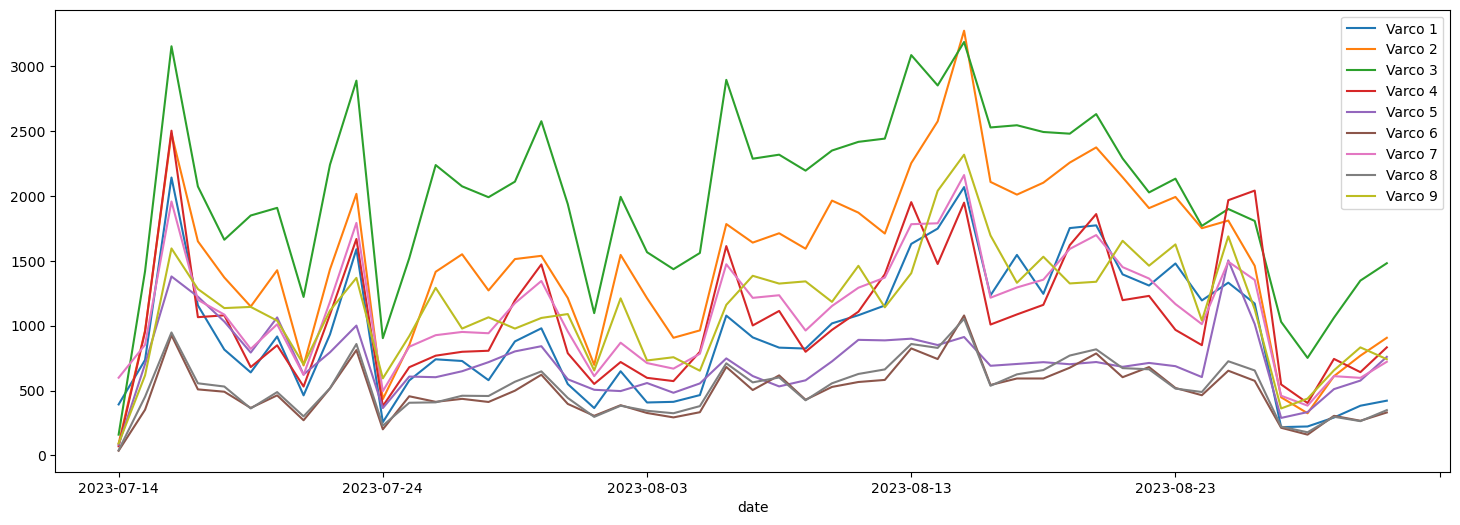

In [38]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18,6))
#contapersone_passaggi_df.set_index("data").groupby("varco").plot( figsize=(15, 5), ax=plt.gca())
g_plot = lambda x:x.plot(x = "date", y = "presenze", ax=ax, label=x.name)
contapersone_passaggi_df.groupby("varco").apply(g_plot)
plt.show()

# Contapersone presenze

In [39]:
contapersone_presenze_df.rename(columns={"data": "date"}, inplace=True)
contapersone_presenze_df = contapersone_presenze_df[
    (contapersone_presenze_df["date"] >= START_DATE) & 
    (contapersone_presenze_df["date"] <= END_DATE)
]
contapersone_presenze_df

,date,varco,presenze
0,2023-07-15,Varco 1,183
1,2023-07-15,Varco 2,204
2,2023-07-15,Varco 3,304
3,2023-07-15,Varco 4,199
4,2023-07-15,Varco 5,117
...,...,...,...
427,2023-08-31,Varco 5,127
428,2023-08-31,Varco 6,145
429,2023-08-31,Varco 7,267
430,2023-08-31,Varco 8,145


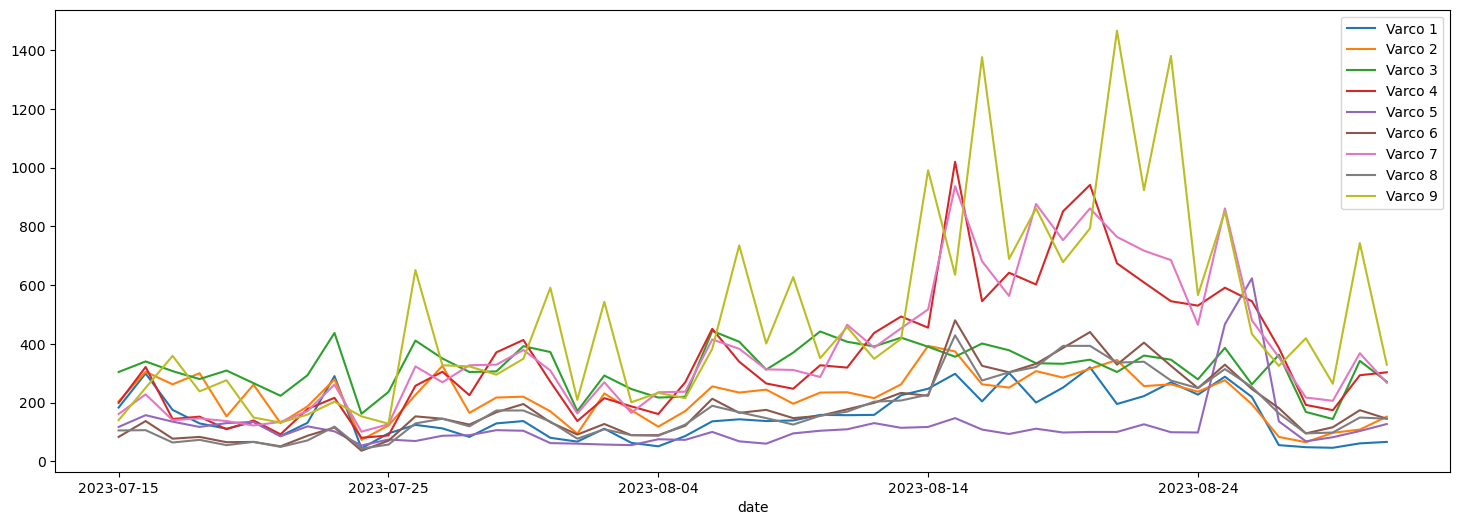

In [40]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18,6))
#contapersone_presenze_df.set_index("data").groupby("varco").plot( figsize=(15, 5), ax=plt.gca())
g_plot = lambda x:x.plot(x = "date", y = "presenze", ax=ax, label=x.name)
contapersone_presenze_df.groupby("varco").apply(g_plot)
plt.show()

# Contamezzi

### Contamezzi descrizione sensore

In [41]:
contamezzi_descrizione_sensore_df

,sensore,direzione,latitudine,longitudine,descrizione_direzione
0,M40,1,46.146086,10.972362,ENTRATA A MOLVENO da Andalo
1,M40,2,46.146086,10.972362,USCITA DA MOLVENO verso Andalo
2,M42,2,46.130443,10.968595,ENTRATA A MOLVENO da S. Lorenzo Dorsino
3,M42,1,46.130443,10.968595,USCITA DA MOLVENO verso S. Lorenzo Dorsino
4,M47,1,46.140916,10.963959,ENTRATA ALLA SPIAGGIA DI MOLVENO
5,M47,2,46.140916,10.963959,USCITA DALLA SPIAGGIA DI MOLVENO


In [42]:
contamezzi_descrizione_sensore_df = gpd.GeoDataFrame(
    contamezzi_descrizione_sensore_df,
    crs="epsg:4326",
    geometry=gpd.points_from_xy(\
            contamezzi_descrizione_sensore_df.longitudine,
            contamezzi_descrizione_sensore_df.latitudine)
)
center_lon = contamezzi_descrizione_sensore_df.geometry.unary_union.convex_hull.centroid.x
center_lat = contamezzi_descrizione_sensore_df.geometry.unary_union.convex_hull.centroid.y

In [43]:
contamezzi_descrizione_sensore_df.explore(marker_kwds={"color": "yellow", "radius": "4"})


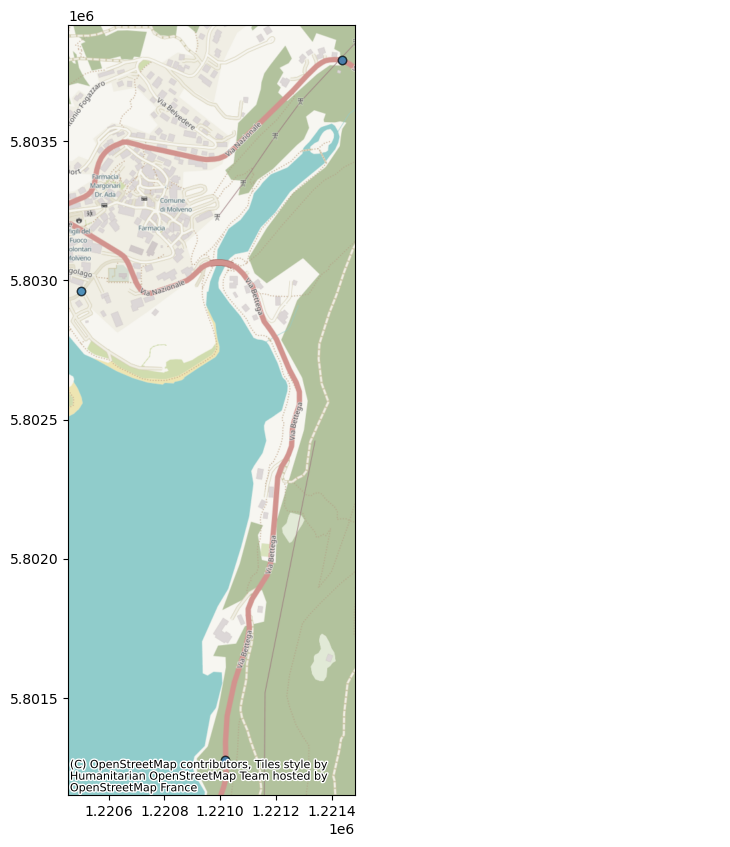

In [44]:
ax = contamezzi_descrizione_sensore_df.to_crs(epsg=3857).plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax)

In [45]:
# Inizializzazione della mappa Folium
map_molveno = folium.Map(location=[center_lat, center_lon], zoom_start=13)

# Aggiunta del layer MarkerCluster alla mappa
marker_cluster = MarkerCluster().add_to(map_molveno)

# Definizione dei colori per le etichette
color_dict = {1: 'purple', 2: 'orange'}

# Aggiunta dei punti al MarkerCluster con icone personalizzate
for idx, row in contamezzi_descrizione_sensore_df.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        icon=folium.Icon(color=color_dict[row['direzione']], icon='info-sign'),
        popup=row['descrizione_direzione']
    ).add_to(marker_cluster)
map_molveno

### Contamezzi Molveno

In [46]:
contamezzi_df.rename(columns={"data": "date"}, inplace=True)
contamezzi_df

,date,sensore,direzione,comune,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato
0,2023-06-29 09:00:00,M40,1,MOLVENO,76,16,1,1,2,0,0,1
1,2023-06-29 09:00:00,M40,2,MOLVENO,53,12,4,0,2,0,0,3
2,2023-06-29 10:00:00,M40,1,MOLVENO,166,44,5,3,4,1,0,2
3,2023-06-29 10:00:00,M40,2,MOLVENO,116,31,5,6,1,0,0,6
4,2023-06-29 11:00:00,M40,1,MOLVENO,147,38,4,8,3,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
13821,2023-10-04 21:00:00,M47,2,MOLVENO,11,0,0,0,0,0,0,0
13822,2023-10-04 22:00:00,M47,1,MOLVENO,1,2,0,0,0,0,0,0
13823,2023-10-04 22:00:00,M47,2,MOLVENO,3,0,0,0,0,0,0,0
13824,2023-10-04 23:00:00,M47,1,MOLVENO,4,1,0,0,0,0,0,0


### Enrich the dataset - split the date and provide total cars

In [47]:
contamezzi_df["date"] = pd.to_datetime(contamezzi_df["date"])
contamezzi_df["day"] = pd.to_datetime(pd.to_datetime(contamezzi_df["date"]).dt.date)
contamezzi_df["hour"] = pd.to_datetime(contamezzi_df["date"]).dt.hour
contamezzi_df = contamezzi_df[
    (contamezzi_df["date"] >= START_DATE) &
    (contamezzi_df["date"] <= END_DATE)
]
contamezzi_df["total_cars"] = contamezzi_df[["cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato"]].sum(axis=1)
contamezzi_df

,date,sensore,direzione,comune,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,day,hour,total_cars
78,2023-07-01 00:00:00,M40,1,MOLVENO,12,4,0,1,0,0,0,0,2023-07-01,0,17
79,2023-07-01 00:00:00,M40,2,MOLVENO,11,2,0,0,0,0,0,0,2023-07-01,0,13
80,2023-07-01 01:00:00,M40,1,MOLVENO,8,0,1,0,0,0,0,0,2023-07-01,1,9
81,2023-07-01 01:00:00,M40,2,MOLVENO,2,1,0,0,0,0,0,0,2023-07-01,1,3
82,2023-07-01 02:00:00,M40,1,MOLVENO,5,0,0,0,0,0,0,0,2023-07-01,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12143,2023-08-30 22:00:00,M47,2,MOLVENO,23,2,0,0,0,0,0,0,2023-08-30,22,25
12144,2023-08-30 23:00:00,M47,1,MOLVENO,9,1,0,1,0,0,0,0,2023-08-30,23,11
12145,2023-08-30 23:00:00,M47,2,MOLVENO,17,1,0,0,0,0,0,0,2023-08-30,23,18
12146,2023-08-31 00:00:00,M47,1,MOLVENO,7,0,0,0,0,0,0,0,2023-08-31,0,7


In [48]:
contamezzi_df.dtypes

date           datetime64[ns]
sensore                object
direzione               int64
comune                 object
cl1                     int64
cl2                     int64
cl3                     int64
cl4                     int64
cl5                     int64
cl6                     int64
cl7                     int64
nonrilevato             int64
day            datetime64[ns]
hour                    int32
total_cars              int64
dtype: object

### Example of filtering per specific day

In [49]:
contamezzi_df[(contamezzi_df["day"] >= "2023-07-29") & (contamezzi_df["day"] <= "2023-07-30")]

,date,sensore,direzione,comune,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,day,hour,total_cars
1422,2023-07-29 00:00:00,M40,1,MOLVENO,22,5,2,0,0,1,0,0,2023-07-29,0,30
1423,2023-07-29 00:00:00,M40,2,MOLVENO,12,0,1,0,0,0,0,1,2023-07-29,0,14
1424,2023-07-29 01:00:00,M40,1,MOLVENO,10,2,2,0,0,0,0,0,2023-07-29,1,14
1425,2023-07-29 01:00:00,M40,2,MOLVENO,5,3,0,0,0,0,0,0,2023-07-29,1,8
1426,2023-07-29 02:00:00,M40,1,MOLVENO,12,2,0,0,0,0,0,0,2023-07-29,2,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10653,2023-07-30 21:00:00,M47,2,MOLVENO,63,6,0,0,0,0,0,0,2023-07-30,21,69
10654,2023-07-30 22:00:00,M47,1,MOLVENO,40,3,0,0,0,0,0,2,2023-07-30,22,45
10655,2023-07-30 22:00:00,M47,2,MOLVENO,33,1,0,0,0,0,0,2,2023-07-30,22,36
10656,2023-07-30 23:00:00,M47,1,MOLVENO,17,2,0,1,0,0,0,0,2023-07-30,23,20


## Summarize the presence of cars

### Entrate da Andalo (sensore M40)

In [50]:
entrata_andalo = contamezzi_df[(contamezzi_df["sensore"] == "M40") & (contamezzi_df["direzione"] == 1)].groupby("date")[["cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato", "total_cars"]].sum()
entrata_andalo = entrata_andalo.reset_index()
entrata_andalo["day"] = pd.to_datetime(pd.to_datetime(entrata_andalo["date"]).dt.date)
entrata_andalo

,date,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars,day
0,2023-07-01 00:00:00,12,4,0,1,0,0,0,0,17,2023-07-01
1,2023-07-01 01:00:00,8,0,1,0,0,0,0,0,9,2023-07-01
2,2023-07-01 02:00:00,5,0,0,0,0,0,0,0,5,2023-07-01
3,2023-07-01 03:00:00,0,0,1,0,0,0,0,0,1,2023-07-01
4,2023-07-01 04:00:00,3,3,0,0,0,0,0,0,6,2023-07-01
...,...,...,...,...,...,...,...,...,...,...,...
1460,2023-08-30 20:00:00,52,8,2,1,0,0,0,0,63,2023-08-30
1461,2023-08-30 21:00:00,33,3,0,1,0,1,0,0,38,2023-08-30
1462,2023-08-30 22:00:00,47,5,0,0,0,0,0,2,54,2023-08-30
1463,2023-08-30 23:00:00,19,1,0,1,0,0,0,0,21,2023-08-30


#### Entrate in un giorno specifico

In [51]:
entrata_andalo.dtypes

date           datetime64[ns]
cl1                     int64
cl2                     int64
cl3                     int64
cl4                     int64
cl5                     int64
cl6                     int64
cl7                     int64
nonrilevato             int64
total_cars              int64
day            datetime64[ns]
dtype: object

In [52]:
entrata_andalo[entrata_andalo["day"] == SPECIFIC_DAY]

,date,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars,day
672,2023-07-29 00:00:00,22,5,2,0,0,1,0,0,30,2023-07-29
673,2023-07-29 01:00:00,10,2,2,0,0,0,0,0,14,2023-07-29
674,2023-07-29 02:00:00,12,2,0,0,0,0,0,0,14,2023-07-29
675,2023-07-29 03:00:00,7,1,0,0,0,0,0,0,8,2023-07-29
676,2023-07-29 04:00:00,6,0,1,0,0,0,0,0,7,2023-07-29
677,2023-07-29 05:00:00,5,1,0,0,1,0,0,0,7,2023-07-29
678,2023-07-29 06:00:00,15,6,2,1,1,0,0,0,25,2023-07-29
679,2023-07-29 07:00:00,55,14,6,2,0,0,0,1,78,2023-07-29
680,2023-07-29 08:00:00,129,46,6,5,3,0,0,3,192,2023-07-29
681,2023-07-29 09:00:00,212,61,16,10,2,0,0,5,306,2023-07-29


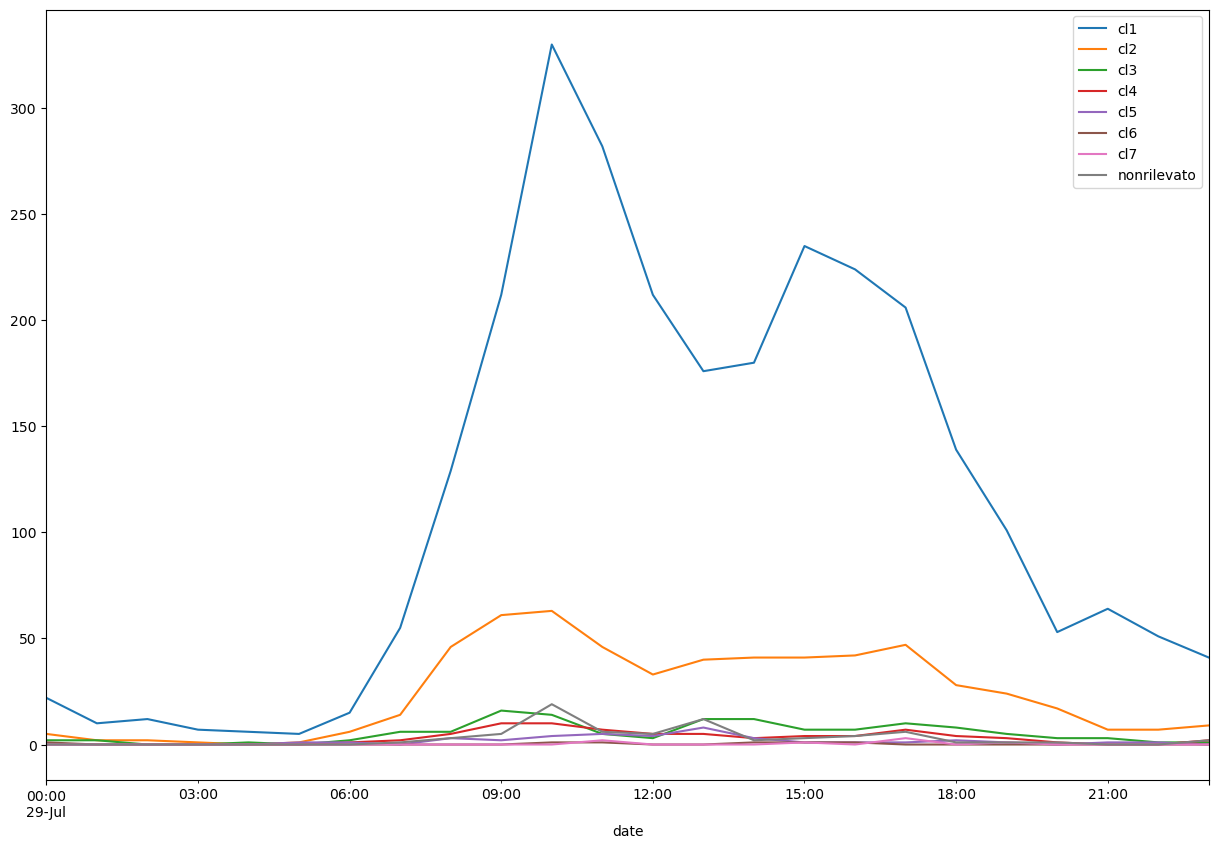

In [53]:
entrata_andalo[entrata_andalo["day"] == "2023-07-29"][["date", "cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato"]].plot(x="date", figsize=(15, 10))
plt.show()

### Uscite da Andalo (sensore M40)

In [54]:
uscita_andalo = contamezzi_df[(contamezzi_df["sensore"] == "M40") & (contamezzi_df["direzione"] == 2)].groupby("date")[["cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato", "total_cars"]].sum()
uscita_andalo = uscita_andalo.reset_index()
uscita_andalo["day"] = pd.to_datetime(pd.to_datetime(uscita_andalo["date"]).dt.date)
uscita_andalo

,date,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars,day
0,2023-07-01 00:00:00,11,2,0,0,0,0,0,0,13,2023-07-01
1,2023-07-01 01:00:00,2,1,0,0,0,0,0,0,3,2023-07-01
2,2023-07-01 02:00:00,1,0,0,0,0,0,0,0,1,2023-07-01
3,2023-07-01 03:00:00,1,0,0,0,0,0,0,0,1,2023-07-01
4,2023-07-01 04:00:00,7,0,0,0,0,0,0,0,7,2023-07-01
...,...,...,...,...,...,...,...,...,...,...,...
1460,2023-08-30 20:00:00,51,6,0,0,0,0,0,0,57,2023-08-30
1461,2023-08-30 21:00:00,46,1,0,0,0,0,0,1,48,2023-08-30
1462,2023-08-30 22:00:00,30,5,1,0,0,1,0,0,37,2023-08-30
1463,2023-08-30 23:00:00,22,0,0,0,0,0,0,0,22,2023-08-30


#### Uscite in un giorno specifico

In [55]:
uscita_andalo[uscita_andalo["day"] == SPECIFIC_DAY]

,date,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars,day
672,2023-07-29 00:00:00,12,0,1,0,0,0,0,1,14,2023-07-29
673,2023-07-29 01:00:00,5,3,0,0,0,0,0,0,8,2023-07-29
674,2023-07-29 02:00:00,1,0,0,0,0,0,0,0,1,2023-07-29
675,2023-07-29 03:00:00,2,1,0,0,0,0,0,0,3,2023-07-29
676,2023-07-29 04:00:00,4,0,0,0,0,0,0,0,4,2023-07-29
677,2023-07-29 05:00:00,9,3,1,0,1,0,0,0,14,2023-07-29
678,2023-07-29 06:00:00,35,1,3,0,2,0,0,0,41,2023-07-29
679,2023-07-29 07:00:00,71,15,2,4,2,0,1,1,96,2023-07-29
680,2023-07-29 08:00:00,143,32,4,3,2,0,1,5,190,2023-07-29
681,2023-07-29 09:00:00,221,40,6,3,6,0,0,12,288,2023-07-29


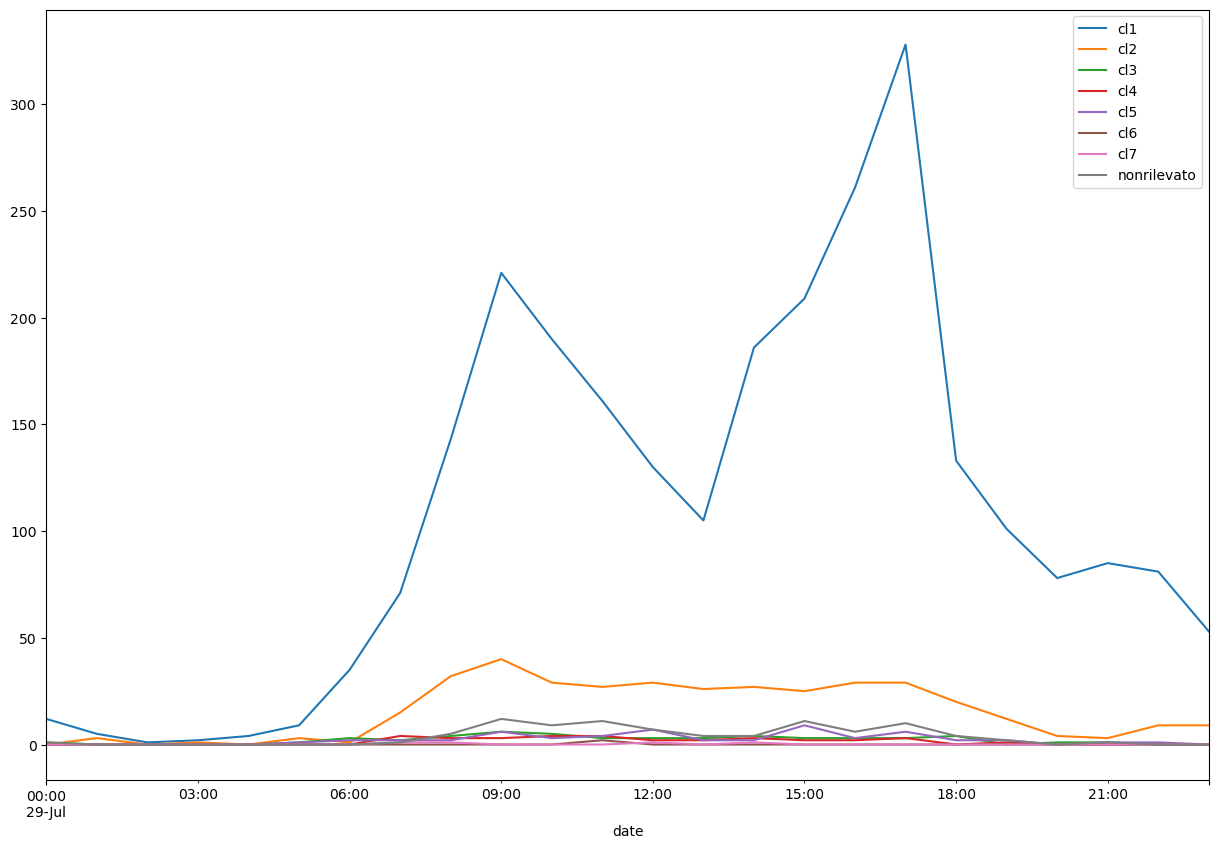

In [56]:
uscita_andalo[uscita_andalo["day"] == SPECIFIC_DAY][["date", "cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato"]].plot(x="date", figsize=(15, 10))
plt.show()

### Find the differences of entry/exit from Andalo

In [57]:
diff_andalo_df = entrata_andalo.set_index(["date", "day"]).subtract(uscita_andalo.set_index(["date", "day"])).reset_index()
diff_andalo_df

,date,day,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
0,2023-07-01 00:00:00,2023-07-01,1,2,0,1,0,0,0,0,4
1,2023-07-01 01:00:00,2023-07-01,6,-1,1,0,0,0,0,0,6
2,2023-07-01 02:00:00,2023-07-01,4,0,0,0,0,0,0,0,4
3,2023-07-01 03:00:00,2023-07-01,-1,0,1,0,0,0,0,0,0
4,2023-07-01 04:00:00,2023-07-01,-4,3,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
1460,2023-08-30 20:00:00,2023-08-30,1,2,2,1,0,0,0,0,6
1461,2023-08-30 21:00:00,2023-08-30,-13,2,0,1,0,1,0,-1,-10
1462,2023-08-30 22:00:00,2023-08-30,17,0,-1,0,0,-1,0,2,17
1463,2023-08-30 23:00:00,2023-08-30,-3,1,0,1,0,0,0,0,-1


#### Total cars inside Molveno in one specific day (Based only on Andalo Sensors)

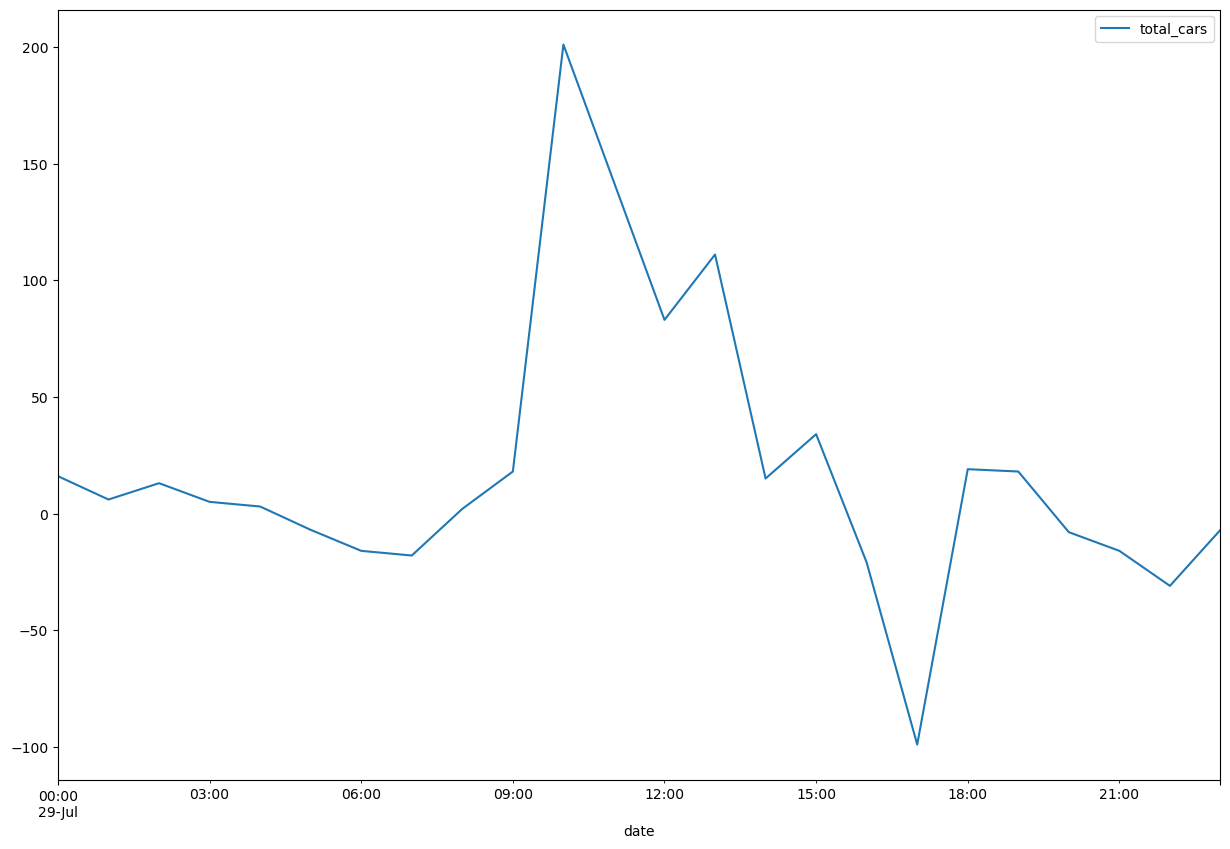

In [58]:
diff_andalo_df[diff_andalo_df["day"] == SPECIFIC_DAY][["date", "total_cars"]].plot(x="date", figsize=(15, 10))
plt.show()

#### Calculate cumulativa Andalo

In [59]:
cumulativa_andalo_df = diff_andalo_df.set_index(["date", "day"]).cumsum().reset_index()
cumulativa_andalo_df

,date,day,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
0,2023-07-01 00:00:00,2023-07-01,1,2,0,1,0,0,0,0,4
1,2023-07-01 01:00:00,2023-07-01,7,1,1,1,0,0,0,0,10
2,2023-07-01 02:00:00,2023-07-01,11,1,1,1,0,0,0,0,14
3,2023-07-01 03:00:00,2023-07-01,10,1,2,1,0,0,0,0,14
4,2023-07-01 04:00:00,2023-07-01,6,4,2,1,0,0,0,0,13
...,...,...,...,...,...,...,...,...,...,...,...
1460,2023-08-30 20:00:00,2023-08-30,4142,11402,3601,2171,-77,186,-7,-503,20915
1461,2023-08-30 21:00:00,2023-08-30,4129,11404,3601,2172,-77,187,-7,-504,20905
1462,2023-08-30 22:00:00,2023-08-30,4146,11404,3600,2172,-77,186,-7,-502,20922
1463,2023-08-30 23:00:00,2023-08-30,4143,11405,3600,2173,-77,186,-7,-502,20921


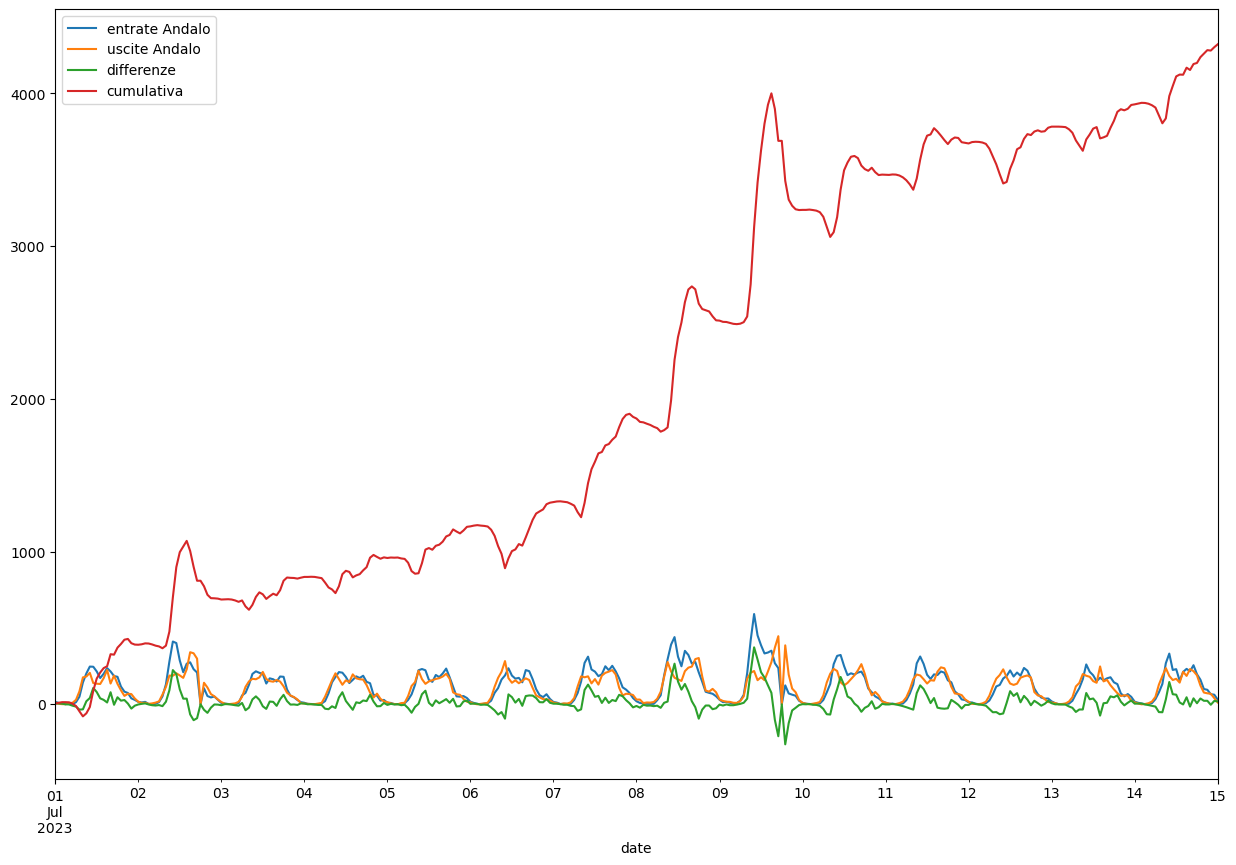

In [60]:
ax = entrata_andalo[entrata_andalo["date"] <= "2023-07-15"].plot(x="date", y="total_cars", label="entrate Andalo", figsize=(15, 10))
uscita_andalo[uscita_andalo["date"] <= "2023-07-15"].plot(ax=ax, x="date", y="total_cars", label="uscite Andalo", figsize=(15, 10))
diff_andalo_df[diff_andalo_df["date"] <= "2023-07-15"].plot(ax=ax, x="date", y="total_cars", label="differenze", figsize=(15, 10))
cumulativa_andalo_df[cumulativa_andalo_df["date"] <= "2023-07-15"].plot(ax=ax, x="date", y="total_cars", label="cumulativa", figsize=(15, 10))
plt.show()

### Entrate da  Dorsino (sensore M42)

In [61]:
entrata_dorsino = contamezzi_df[(contamezzi_df["sensore"] == "M42") & (contamezzi_df["direzione"] == 2)].groupby("date")[["cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato", "total_cars"]].sum()
entrata_dorsino = entrata_dorsino.reset_index()
entrata_dorsino["day"] = pd.to_datetime(pd.to_datetime(entrata_dorsino["date"]).dt.date)
entrata_dorsino

,date,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars,day
0,2023-07-01 00:00:00,7,0,0,0,0,0,0,0,7,2023-07-01
1,2023-07-01 01:00:00,0,0,0,0,0,0,0,0,0,2023-07-01
2,2023-07-01 02:00:00,1,1,0,0,0,0,0,0,2,2023-07-01
3,2023-07-01 03:00:00,0,0,0,0,0,0,0,0,0,2023-07-01
4,2023-07-01 04:00:00,1,0,0,0,0,0,0,0,1,2023-07-01
...,...,...,...,...,...,...,...,...,...,...,...
1460,2023-08-30 20:00:00,20,1,0,1,0,0,0,0,22,2023-08-30
1461,2023-08-30 21:00:00,9,0,0,0,0,0,0,0,9,2023-08-30
1462,2023-08-30 22:00:00,10,0,0,0,0,0,0,0,10,2023-08-30
1463,2023-08-30 23:00:00,5,0,0,0,0,0,0,0,5,2023-08-30


### Uscite da Dorsino

In [62]:
uscita_dorsino = contamezzi_df[(contamezzi_df["sensore"] == "M42") & (contamezzi_df["direzione"] == 1)].groupby("date")[["cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato", "total_cars"]].sum()
uscita_dorsino = uscita_dorsino.reset_index()
uscita_dorsino["day"] = pd.to_datetime(pd.to_datetime(uscita_dorsino["date"]).dt.date)
uscita_dorsino

,date,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars,day
0,2023-07-01 00:00:00,7,2,0,0,0,0,0,0,9,2023-07-01
1,2023-07-01 01:00:00,3,0,0,0,0,0,0,1,4,2023-07-01
2,2023-07-01 02:00:00,1,0,0,0,0,0,0,0,1,2023-07-01
3,2023-07-01 03:00:00,0,0,0,0,0,0,0,0,0,2023-07-01
4,2023-07-01 04:00:00,1,0,0,1,0,0,0,0,2,2023-07-01
...,...,...,...,...,...,...,...,...,...,...,...
1460,2023-08-30 20:00:00,19,2,0,0,0,0,0,2,23,2023-08-30
1461,2023-08-30 21:00:00,27,2,0,0,1,0,0,5,35,2023-08-30
1462,2023-08-30 22:00:00,22,0,0,1,0,0,0,1,24,2023-08-30
1463,2023-08-30 23:00:00,13,1,1,0,0,0,0,0,15,2023-08-30


### Find the differences of entry/exit from Dorsino

In [63]:
diff_dorsino_df = entrata_dorsino.set_index(["date", "day"]).subtract(uscita_dorsino.set_index(["date", "day"])).reset_index()
diff_dorsino_df

,date,day,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
0,2023-07-01 00:00:00,2023-07-01,0,-2,0,0,0,0,0,0,-2
1,2023-07-01 01:00:00,2023-07-01,-3,0,0,0,0,0,0,-1,-4
2,2023-07-01 02:00:00,2023-07-01,0,1,0,0,0,0,0,0,1
3,2023-07-01 03:00:00,2023-07-01,0,0,0,0,0,0,0,0,0
4,2023-07-01 04:00:00,2023-07-01,0,0,0,-1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
1460,2023-08-30 20:00:00,2023-08-30,1,-1,0,1,0,0,0,-2,-1
1461,2023-08-30 21:00:00,2023-08-30,-18,-2,0,0,-1,0,0,-5,-26
1462,2023-08-30 22:00:00,2023-08-30,-12,0,0,-1,0,0,0,-1,-14
1463,2023-08-30 23:00:00,2023-08-30,-8,-1,-1,0,0,0,0,0,-10


#### Total cars inside Molveno in one specific day (Based only on Dorsino Sensors)

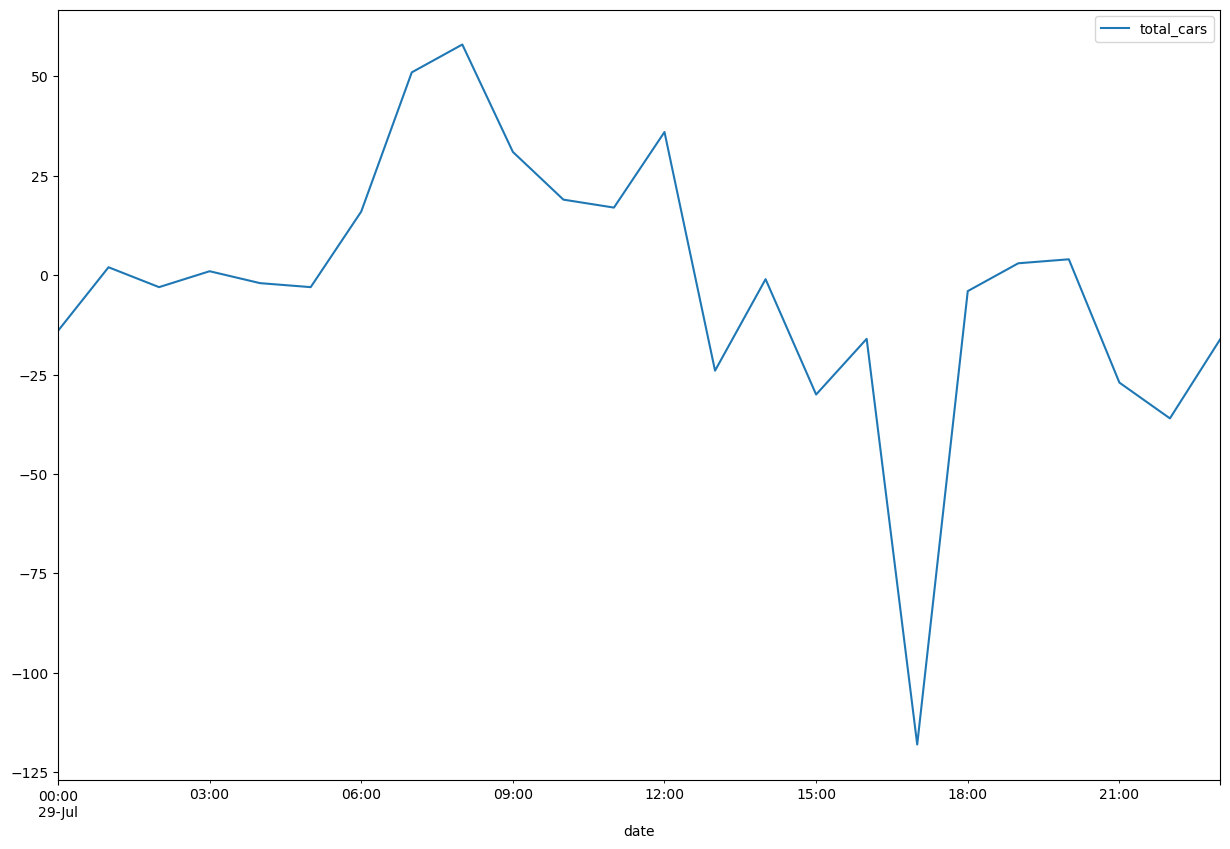

In [64]:
diff_dorsino_df[diff_dorsino_df["day"] == SPECIFIC_DAY][["date", "total_cars"]].plot(x="date", y="total_cars", figsize=(15, 10))
plt.show()

#### Calculate cumulativa Dorsino

In [65]:
cumulativa_dorsino_df = diff_dorsino_df.set_index(["date", "day"]).cumsum().reset_index()
cumulativa_dorsino_df

,date,day,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
0,2023-07-01 00:00:00,2023-07-01,0,-2,0,0,0,0,0,0,-2
1,2023-07-01 01:00:00,2023-07-01,-3,-2,0,0,0,0,0,-1,-6
2,2023-07-01 02:00:00,2023-07-01,-3,-1,0,0,0,0,0,-1,-5
3,2023-07-01 03:00:00,2023-07-01,-3,-1,0,0,0,0,0,-1,-5
4,2023-07-01 04:00:00,2023-07-01,-3,-1,0,-1,0,0,0,-1,-6
...,...,...,...,...,...,...,...,...,...,...,...
1460,2023-08-30 20:00:00,2023-08-30,11050,-5933,-2848,-1347,-768,-67,75,-3387,-3225
1461,2023-08-30 21:00:00,2023-08-30,11032,-5935,-2848,-1347,-769,-67,75,-3392,-3251
1462,2023-08-30 22:00:00,2023-08-30,11020,-5935,-2848,-1348,-769,-67,75,-3393,-3265
1463,2023-08-30 23:00:00,2023-08-30,11012,-5936,-2849,-1348,-769,-67,75,-3393,-3275


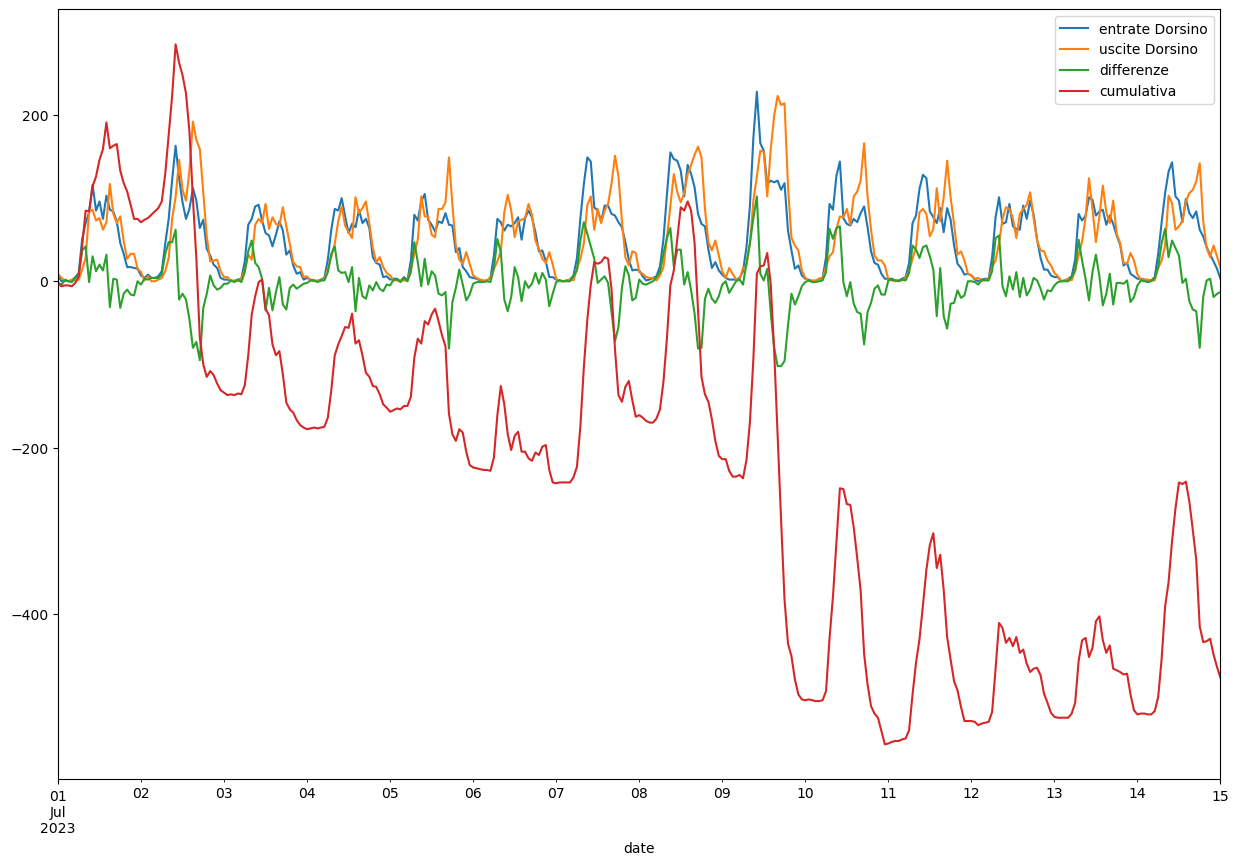

In [66]:
ax = entrata_dorsino[entrata_dorsino["date"] <= "2023-07-15"].plot(x="date", y="total_cars", label="entrate Dorsino", figsize=(15, 10))
uscita_dorsino[uscita_dorsino["date"] <= "2023-07-15"].plot(ax=ax, x="date", y="total_cars", label="uscite Dorsino", figsize=(15, 10))
diff_dorsino_df[diff_dorsino_df["date"] <= "2023-07-15"].plot(ax=ax, x="date", y="total_cars", label="differenze", figsize=(15, 10))
cumulativa_dorsino_df[cumulativa_dorsino_df["date"] <= "2023-07-15"].plot(ax=ax, x="date", y="total_cars", label="cumulativa", figsize=(15, 10))
plt.show()

### Entrate spiaggia

In [67]:
entrata_lago = contamezzi_df[(contamezzi_df["sensore"] == "M47") & (contamezzi_df["direzione"] == 1) & (contamezzi_df["day"] <= END_DATE)]
entrata_lago = entrata_lago.reset_index().drop(columns=['index','sensore','direzione','comune'])
entrata_lago

,date,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,day,hour,total_cars
0,2023-07-01 00:00:00,9,0,0,0,0,0,0,0,2023-07-01,0,9
1,2023-07-01 01:00:00,4,0,0,0,0,0,0,0,2023-07-01,1,4
2,2023-07-01 02:00:00,2,0,0,0,0,0,0,0,2023-07-01,2,2
3,2023-07-01 03:00:00,0,1,0,0,0,0,0,0,2023-07-01,3,1
4,2023-07-01 04:00:00,2,1,0,0,0,0,0,0,2023-07-01,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1460,2023-08-30 20:00:00,41,7,0,0,0,0,0,1,2023-08-30,20,49
1461,2023-08-30 21:00:00,15,4,1,0,0,0,0,0,2023-08-30,21,20
1462,2023-08-30 22:00:00,19,3,0,0,0,0,0,1,2023-08-30,22,23
1463,2023-08-30 23:00:00,9,1,0,1,0,0,0,0,2023-08-30,23,11


### Uscita spiaggia

In [68]:
uscita_lago = contamezzi_df[(contamezzi_df["sensore"] == "M47") & (contamezzi_df["direzione"] == 2) & (contamezzi_df["day"] <= END_DATE)]
uscita_lago = uscita_lago.reset_index().drop(columns=['index','sensore','direzione','comune'])
uscita_lago

,date,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,day,hour,total_cars
0,2023-07-01 00:00:00,3,1,0,0,0,0,0,0,2023-07-01,0,4
1,2023-07-01 01:00:00,3,0,0,0,0,0,0,0,2023-07-01,1,3
2,2023-07-01 02:00:00,2,0,0,0,0,0,0,0,2023-07-01,2,2
3,2023-07-01 03:00:00,0,0,0,0,0,0,0,0,2023-07-01,3,0
4,2023-07-01 04:00:00,0,0,0,0,0,0,0,0,2023-07-01,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1460,2023-08-30 20:00:00,44,2,0,0,0,0,0,0,2023-08-30,20,46
1461,2023-08-30 21:00:00,37,3,0,1,0,0,0,0,2023-08-30,21,41
1462,2023-08-30 22:00:00,23,2,0,0,0,0,0,0,2023-08-30,22,25
1463,2023-08-30 23:00:00,17,1,0,0,0,0,0,0,2023-08-30,23,18


### Differences entry/exit spiaggia

In [69]:
differenza_lago = entrata_lago.set_index(['date','day','hour']).subtract(uscita_lago.set_index(['date','day','hour']), fill_value=0).reset_index()
differenza_lago

,date,day,hour,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
0,2023-07-01 00:00:00,2023-07-01,0,6,-1,0,0,0,0,0,0,5
1,2023-07-01 01:00:00,2023-07-01,1,1,0,0,0,0,0,0,0,1
2,2023-07-01 02:00:00,2023-07-01,2,0,0,0,0,0,0,0,0,0
3,2023-07-01 03:00:00,2023-07-01,3,0,1,0,0,0,0,0,0,1
4,2023-07-01 04:00:00,2023-07-01,4,2,1,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1460,2023-08-30 20:00:00,2023-08-30,20,-3,5,0,0,0,0,0,1,3
1461,2023-08-30 21:00:00,2023-08-30,21,-22,1,1,-1,0,0,0,0,-21
1462,2023-08-30 22:00:00,2023-08-30,22,-4,1,0,0,0,0,0,1,-2
1463,2023-08-30 23:00:00,2023-08-30,23,-8,0,0,1,0,0,0,0,-7


#### Cumulative Spiaggia 

In [70]:
cumulativa_lago = differenza_lago.copy()
cumulativa_lago['total_carsX'] = cumulativa_lago['total_cars']
for c in ['cl1','cl2','cl3','cl4','cl5','cl6','cl7','nonrilevato','total_cars']:
    cumulativa_lago[c] = cumulativa_lago[c].cumsum()
cumulativa_lago

,date,day,hour,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars,total_carsX
0,2023-07-01 00:00:00,2023-07-01,0,6,-1,0,0,0,0,0,0,5,5
1,2023-07-01 01:00:00,2023-07-01,1,7,-1,0,0,0,0,0,0,6,1
2,2023-07-01 02:00:00,2023-07-01,2,7,-1,0,0,0,0,0,0,6,0
3,2023-07-01 03:00:00,2023-07-01,3,7,0,0,0,0,0,0,0,7,1
4,2023-07-01 04:00:00,2023-07-01,4,9,1,0,0,0,0,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,2023-08-30 20:00:00,2023-08-30,20,12360,1476,-27,680,931,-50,-29,-2547,12794,3
1461,2023-08-30 21:00:00,2023-08-30,21,12338,1477,-26,679,931,-50,-29,-2547,12773,-21
1462,2023-08-30 22:00:00,2023-08-30,22,12334,1478,-26,679,931,-50,-29,-2546,12771,-2
1463,2023-08-30 23:00:00,2023-08-30,23,12326,1478,-26,680,931,-50,-29,-2546,12764,-7


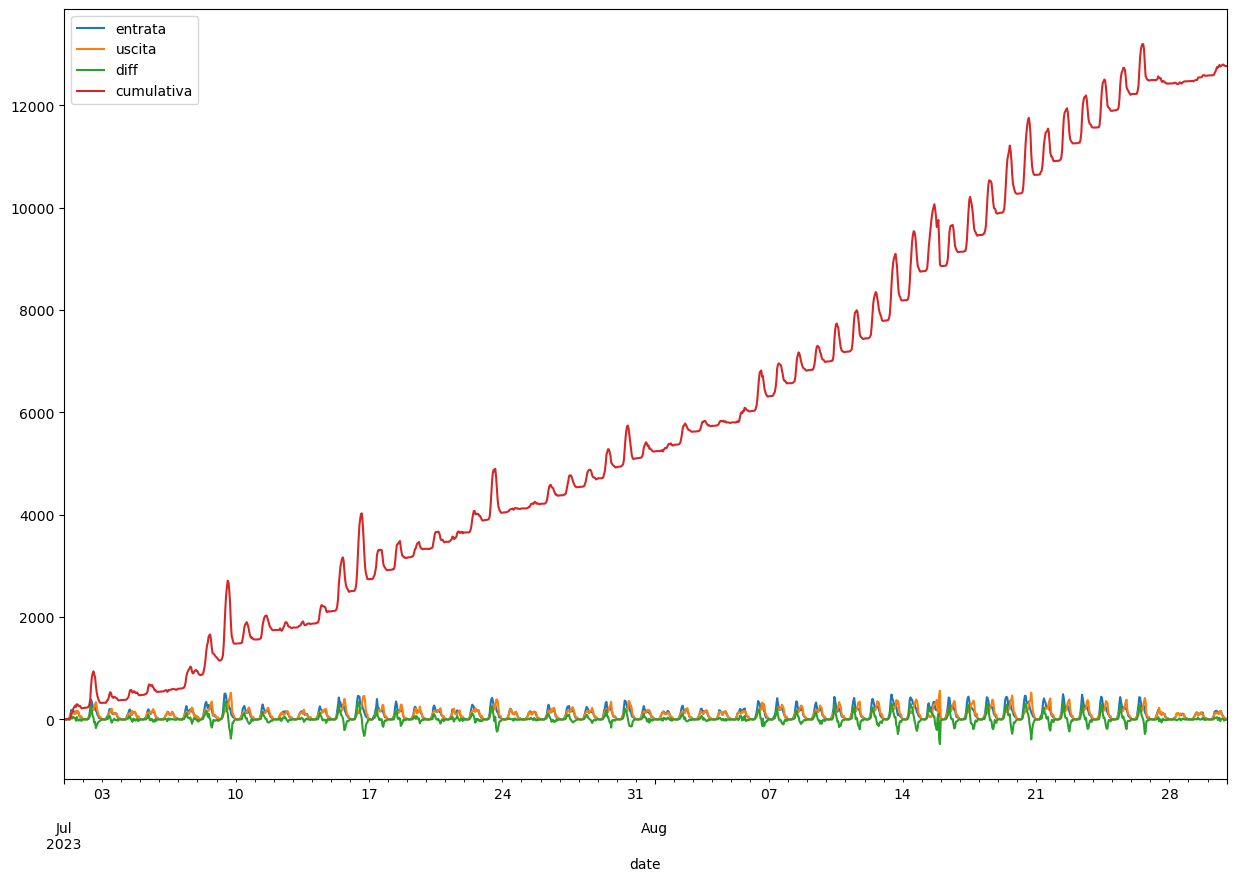

In [71]:
ax = entrata_lago.plot(x="date", y="total_cars", label="entrata", figsize=(15,10))
uscita_lago.plot(ax=ax, x="date", y="total_cars", label="uscita", figsize=(15,10))
differenza_lago.plot(ax=ax, x="date", y="total_cars", label="diff", figsize=(15,10))
cumulativa_lago.plot(ax=ax, x="date", y="total_cars", label="cumulativa", figsize=(15,10))
plt.show()

### Notes

- The results indicate that Dorsino sensors detect more car exits than entries.
- The primary entry point for cars is Andalo

### Find the cars present in Molveno by summing up the data from Andalo and Dorsino sensors

In [72]:
present_cars_molveno = diff_dorsino_df.set_index(["date", "day"]).add(diff_andalo_df.set_index(["date", "day"]), fill_value=0).reset_index()
present_cars_molveno

,date,day,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
0,2023-07-01 00:00:00,2023-07-01,1,0,0,1,0,0,0,0,2
1,2023-07-01 01:00:00,2023-07-01,3,-1,1,0,0,0,0,-1,2
2,2023-07-01 02:00:00,2023-07-01,4,1,0,0,0,0,0,0,5
3,2023-07-01 03:00:00,2023-07-01,-1,0,1,0,0,0,0,0,0
4,2023-07-01 04:00:00,2023-07-01,-4,3,0,-1,0,0,0,0,-2
...,...,...,...,...,...,...,...,...,...,...,...
1460,2023-08-30 20:00:00,2023-08-30,2,1,2,2,0,0,0,-2,5
1461,2023-08-30 21:00:00,2023-08-30,-31,0,0,1,-1,1,0,-6,-36
1462,2023-08-30 22:00:00,2023-08-30,5,0,-1,-1,0,-1,0,1,3
1463,2023-08-30 23:00:00,2023-08-30,-11,0,-1,1,0,0,0,0,-11


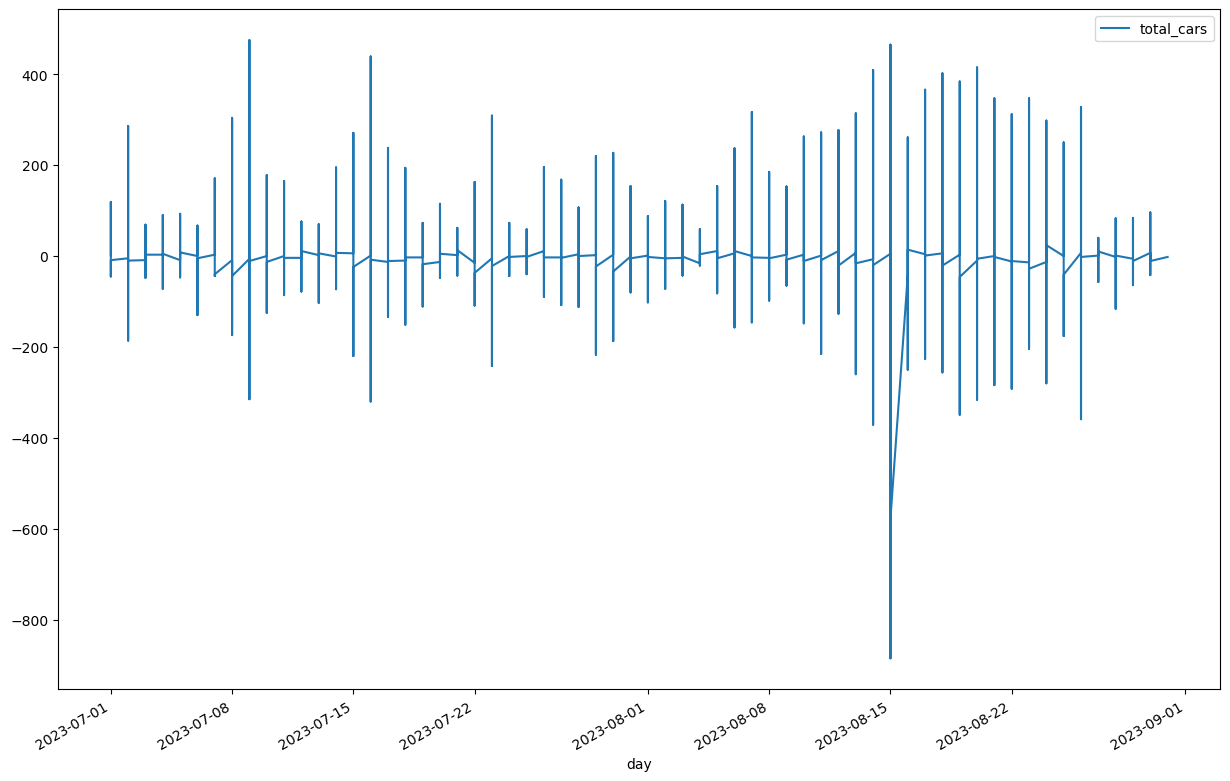

In [73]:
present_cars_molveno.plot(x="day", y="total_cars", figsize=(15, 10))
plt.show()

In [74]:
present_cars_cumulative_molveno = cumulativa_dorsino_df.set_index(["date", "day"]).add(cumulativa_andalo_df.set_index(["date", "day"]), fill_value=0).reset_index()
present_cars_cumulative_molveno[present_cars_cumulative_molveno["date"] <= "2023-07-15"]

,date,day,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
0,2023-07-01 00:00:00,2023-07-01,1,0,0,1,0,0,0,0,2
1,2023-07-01 01:00:00,2023-07-01,4,-1,1,1,0,0,0,-1,4
2,2023-07-01 02:00:00,2023-07-01,8,0,1,1,0,0,0,-1,9
3,2023-07-01 03:00:00,2023-07-01,7,0,2,1,0,0,0,-1,9
4,2023-07-01 04:00:00,2023-07-01,3,3,2,0,0,0,0,-1,7
...,...,...,...,...,...,...,...,...,...,...,...
332,2023-07-14 20:00:00,2023-07-14,2686,1558,240,204,-199,8,11,-681,3827
333,2023-07-14 21:00:00,2023-07-14,2706,1562,242,203,-198,9,11,-682,3853
334,2023-07-14 22:00:00,2023-07-14,2676,1571,244,203,-200,9,11,-683,3831
335,2023-07-14 23:00:00,2023-07-14,2670,1578,248,207,-201,9,11,-684,3838


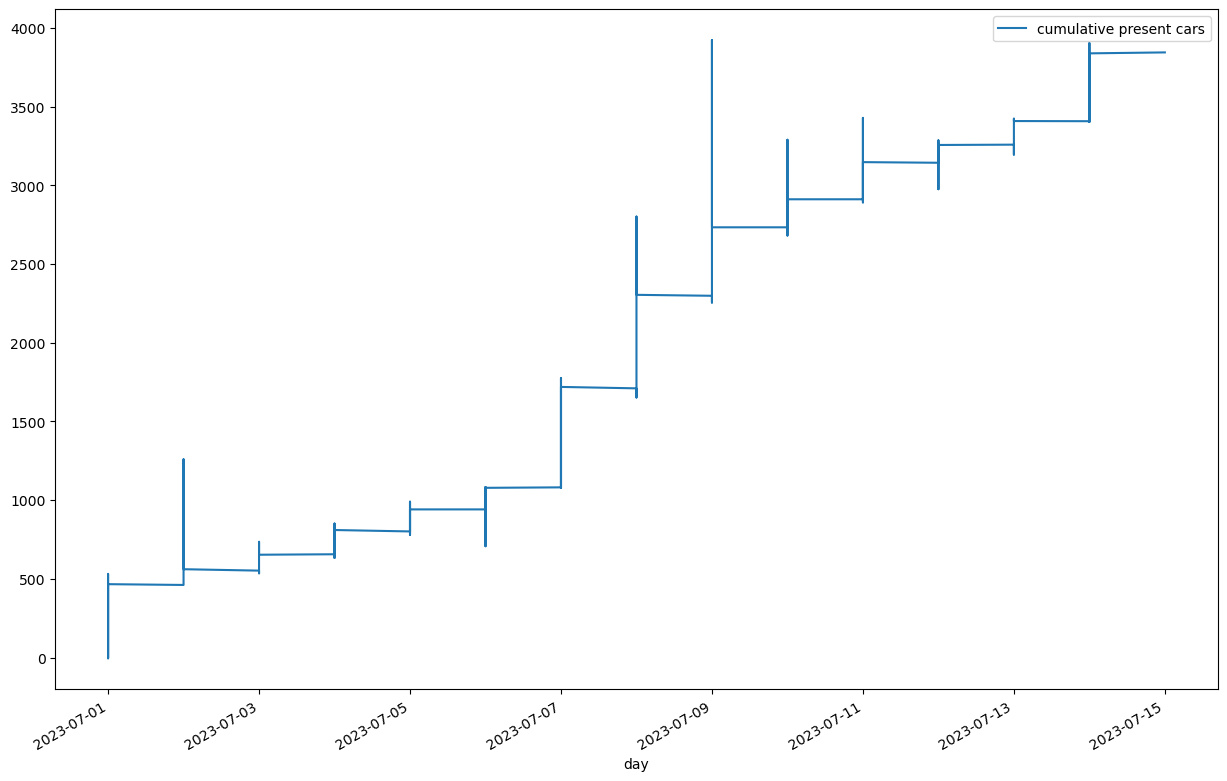

In [75]:
#ax = present_cars_molveno[present_cars_molveno["date"] <= "2023-07-15"].plot(x="day", y="total_cars", label="present cars", figsize=(15, 10))
present_cars_cumulative_molveno[present_cars_cumulative_molveno["date"] <= "2023-07-15"].plot(x="day", y="total_cars", label="cumulative present cars", figsize=(15, 10))
plt.show()

#### Visualize cars present in Molveno in one specific day 

In [76]:
specific_day = present_cars_molveno[
    (present_cars_molveno["day"] == "2023-07-15")]
specific_day

,date,day,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
336,2023-07-15 00:00:00,2023-07-15,7,0,-1,0,0,0,0,0,6
337,2023-07-15 01:00:00,2023-07-15,10,3,0,0,0,0,0,0,13
338,2023-07-15 02:00:00,2023-07-15,7,0,0,0,0,0,0,0,7
339,2023-07-15 03:00:00,2023-07-15,1,0,0,0,0,0,0,0,1
340,2023-07-15 04:00:00,2023-07-15,-6,0,0,0,0,0,0,0,-6
341,2023-07-15 05:00:00,2023-07-15,-11,-1,0,0,0,0,0,0,-12
342,2023-07-15 06:00:00,2023-07-15,10,-1,1,1,-1,0,0,0,10
343,2023-07-15 07:00:00,2023-07-15,31,4,3,0,0,1,0,0,39
344,2023-07-15 08:00:00,2023-07-15,75,24,0,4,-3,0,0,-2,98
345,2023-07-15 09:00:00,2023-07-15,141,26,5,-1,-2,0,0,-2,167


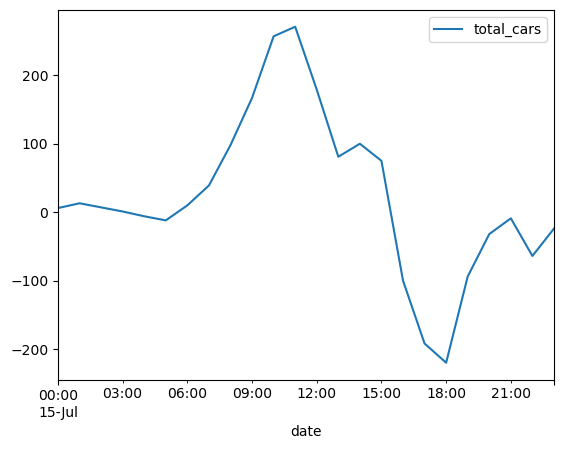

In [77]:
specific_day.plot(x="date", y="total_cars")
plt.show()

# Movimento turistico

In [78]:
movimento_turistico_timeframe = movimento_turistico_molveno_df[
    (movimento_turistico_molveno_df["date"] >= START_DATE) &
    (movimento_turistico_molveno_df["date"] <= END_DATE)
]
movimento_turistico_timeframe

,anno,mese,date,territorio_comunale,arrivi,presenze
546,2023,07,2023-07-01,MOLVENO,1175,2422
547,2023,07,2023-07-02,MOLVENO,741,2307
548,2023,07,2023-07-03,MOLVENO,531,2521
549,2023,07,2023-07-04,MOLVENO,294,2599
550,2023,07,2023-07-05,MOLVENO,379,2668
...,...,...,...,...,...,...
603,2023,08,2023-08-27,MOLVENO,730,2370
604,2023,08,2023-08-28,MOLVENO,394,2420
605,2023,08,2023-08-29,MOLVENO,301,2463
606,2023,08,2023-08-30,MOLVENO,464,2584


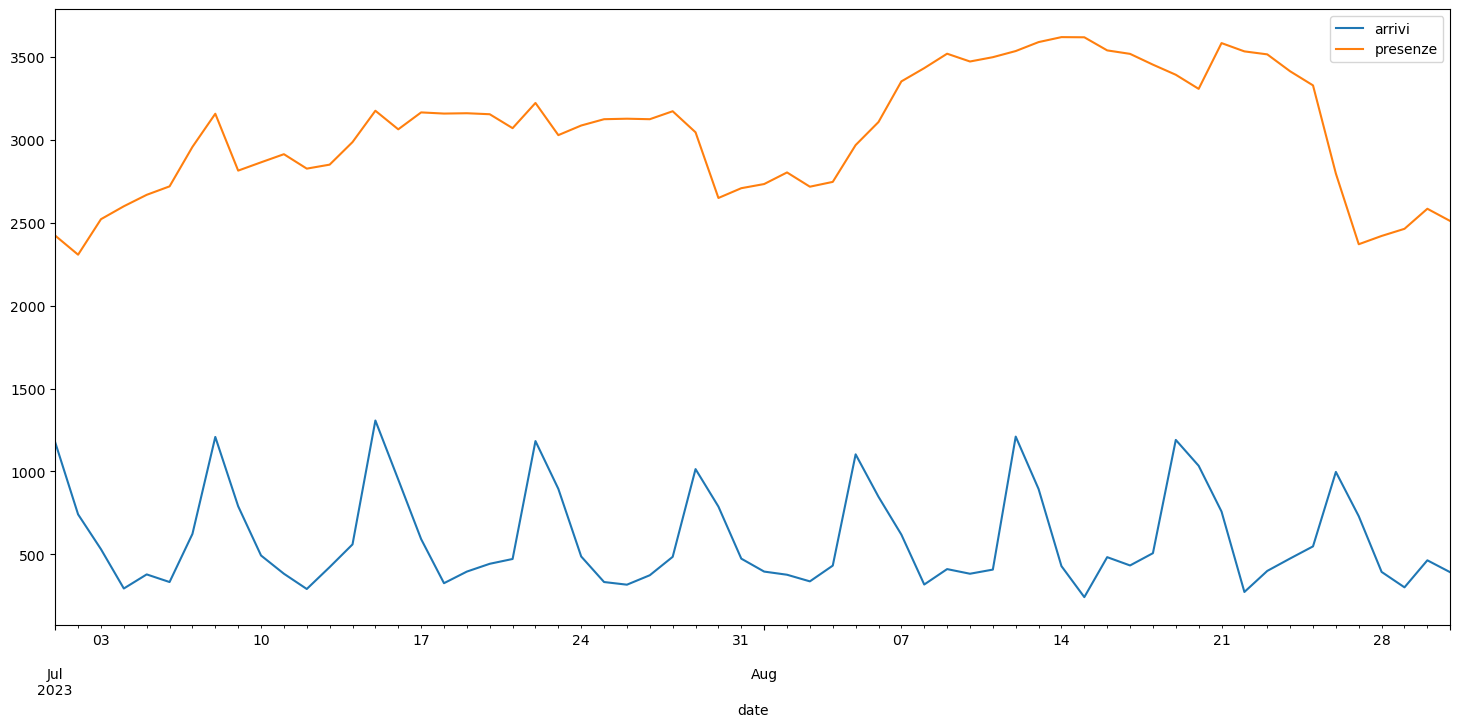

In [79]:
movimento_turistico_timeframe.plot(x="date", y=["arrivi", "presenze"], figsize=(18, 8))
plt.show()

# Meteo Trentino bollettino

In [80]:
meteotrentino_bollettino_df.rename(columns={"data": "date"}, inplace=True)
meteotrentino_bollettino_df["date"] = pd.to_datetime(meteotrentino_bollettino_df["date"])
meteo_timeframe_df = meteotrentino_bollettino_df[
    (meteotrentino_bollettino_df["comune"].str.contains("MOLVENO")) &
    (meteotrentino_bollettino_df["date"] >= START_DATE) &
    (meteotrentino_bollettino_df["date"] <= "2023-08-30")
]
meteo_timeframe_df

,date,comune,ambito,meteo,tmin,tmax,probprec06-12,intprec06-12,probtemp06-12,probprec12-18,intprec12-18,probtemp12-18
36742,2023-07-01,MOLVENO,DOLOMITI,Molto nuvoloso con piogge deboli,14,24,media,moderata,media,media,moderata,media
36784,2023-07-04,MOLVENO,DOLOMITI,Nuvoloso,13,23,molto bassa,debole,molto bassa,media,moderata,media
36806,2023-07-06,MOLVENO,DOLOMITI,Nuvoloso con piogge deboli,12,23,media,debole,media,alta,moderata,alta
36816,2023-07-08,MOLVENO,DOLOMITI,Poco nuvoloso,13,26,media,debole,molto bassa,bassa,debole,bassa
36841,2023-07-11,MOLVENO,DOLOMITI,Poco nuvoloso,18,31,molto bassa,debole,molto bassa,bassa,debole,bassa
36863,2023-07-14,MOLVENO,DOLOMITI,Poco nuvoloso,12,26,molto bassa,debole,molto bassa,molto bassa,debole,molto bassa
36885,2023-07-15,MOLVENO,DOLOMITI,Sereno,13,27,molto bassa,debole,molto bassa,molto bassa,debole,molto bassa
36907,2023-07-16,MOLVENO,DOLOMITI,Sereno,14,27,molto bassa,debole,molto bassa,bassa,debole,bassa
36929,2023-07-17,MOLVENO,DOLOMITI,Poco nuvoloso,16,28,molto bassa,debole,molto bassa,bassa,debole,bassa
36951,2023-07-19,MOLVENO,DOLOMITI,Nuvoloso con piogge deboli,15,28,bassa,debole,bassa,alta,moderata,alta


In [81]:
meteotrentino_bollettino_df["comune"].value_counts()

comune
CENTA SAN NICOLO            1905
SAN MARTINO DI CASTROZZA    1905
PIEVE DI BONO               1903
BEZZECCA                    1900
COMANO TERME                1899
TRENTO                      1897
TIONE DI TRENTO             1897
SANT'ORSOLA                 1896
ROVERETO                    1895
PINZOLO                     1892
PERGINE VALSUGANA           1890
RIVA DEL GARDA              1879
MOLVENO                     1875
MEZZOLOMBARDO               1873
MALE'                       1873
FONDO                       1869
FOLGARIA                    1869
CAVALESE                    1867
CANAZEI                     1864
BASELGA DI PINE'            1863
MEZZANO                     1857
ARCO                        1845
Name: count, dtype: int64

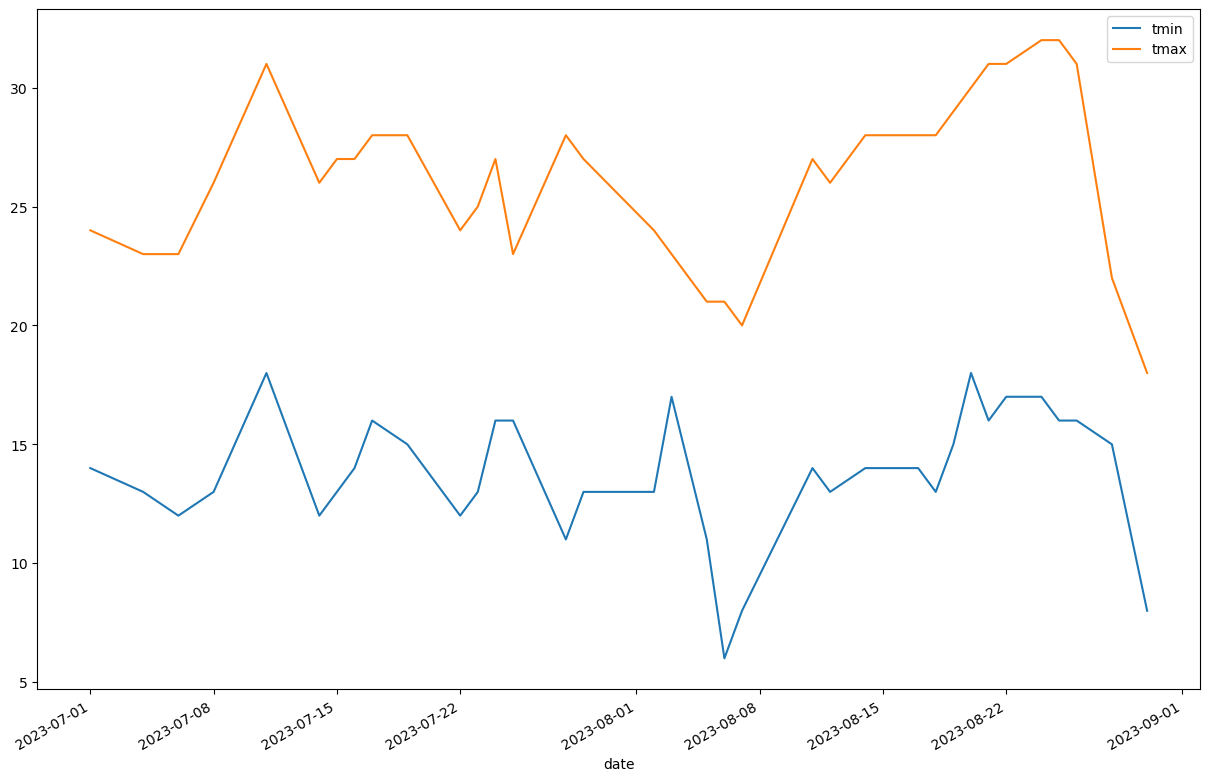

In [82]:
meteo_timeframe_df.plot(x="date", figsize=(15, 10))
plt.show()

# Correlation between Visitors-Vodafone and meteo

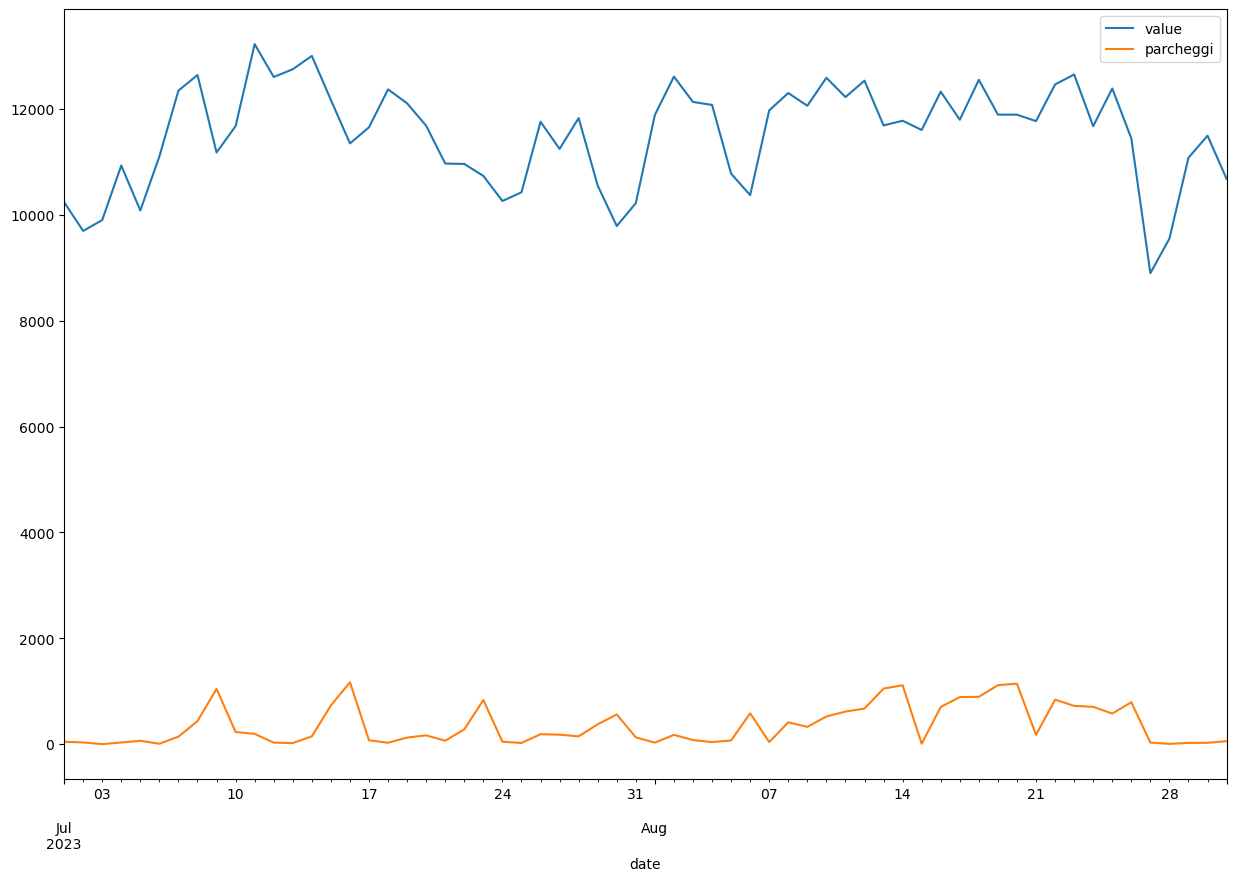

In [83]:
visitors = attendances_timeframe_df[attendances_timeframe_df["userProfile"] == "VISITOR"]
ax = visitors.groupby("date")[["value"]].sum().plot(figsize=(15, 10))
statistiche_parcheggi_molveno_timeframe_df[["TOTALE", "date"]].plot(ax=ax, y="TOTALE", x="date", label="parcheggi")
plt.show()

# Correlation between Meteo and Movimento turistico

In [84]:
print(f"The range of dates for movimento turistico: {len(movimento_turistico_timeframe['date'])}")
print(f"The range of dates for meteo: {len(meteo_timeframe_df['date'])}")

The range of dates for movimento turistico: 62
The range of dates for meteo: 35


In [85]:
# Consider the smallest range of dates - meteo_timeframe 
date_timeframe = meteo_timeframe_df["date"]
presenze = movimento_turistico_timeframe[movimento_turistico_timeframe["date"].isin(date_timeframe)]["presenze"]
visitors = attendances_timeframe_df[(attendances_timeframe_df["userProfile"] == "VISITOR") & (attendances_timeframe_df["date"].isin(date_timeframe))]
visitors = visitors.groupby("date")[["value"]].sum().reset_index()
visitors

,date,value
0,2023-07-01,10243
1,2023-07-04,10934
2,2023-07-06,11106
3,2023-07-08,12644
4,2023-07-11,13228
5,2023-07-14,13005
6,2023-07-15,12172
7,2023-07-16,11352
8,2023-07-17,11657
9,2023-07-19,12108


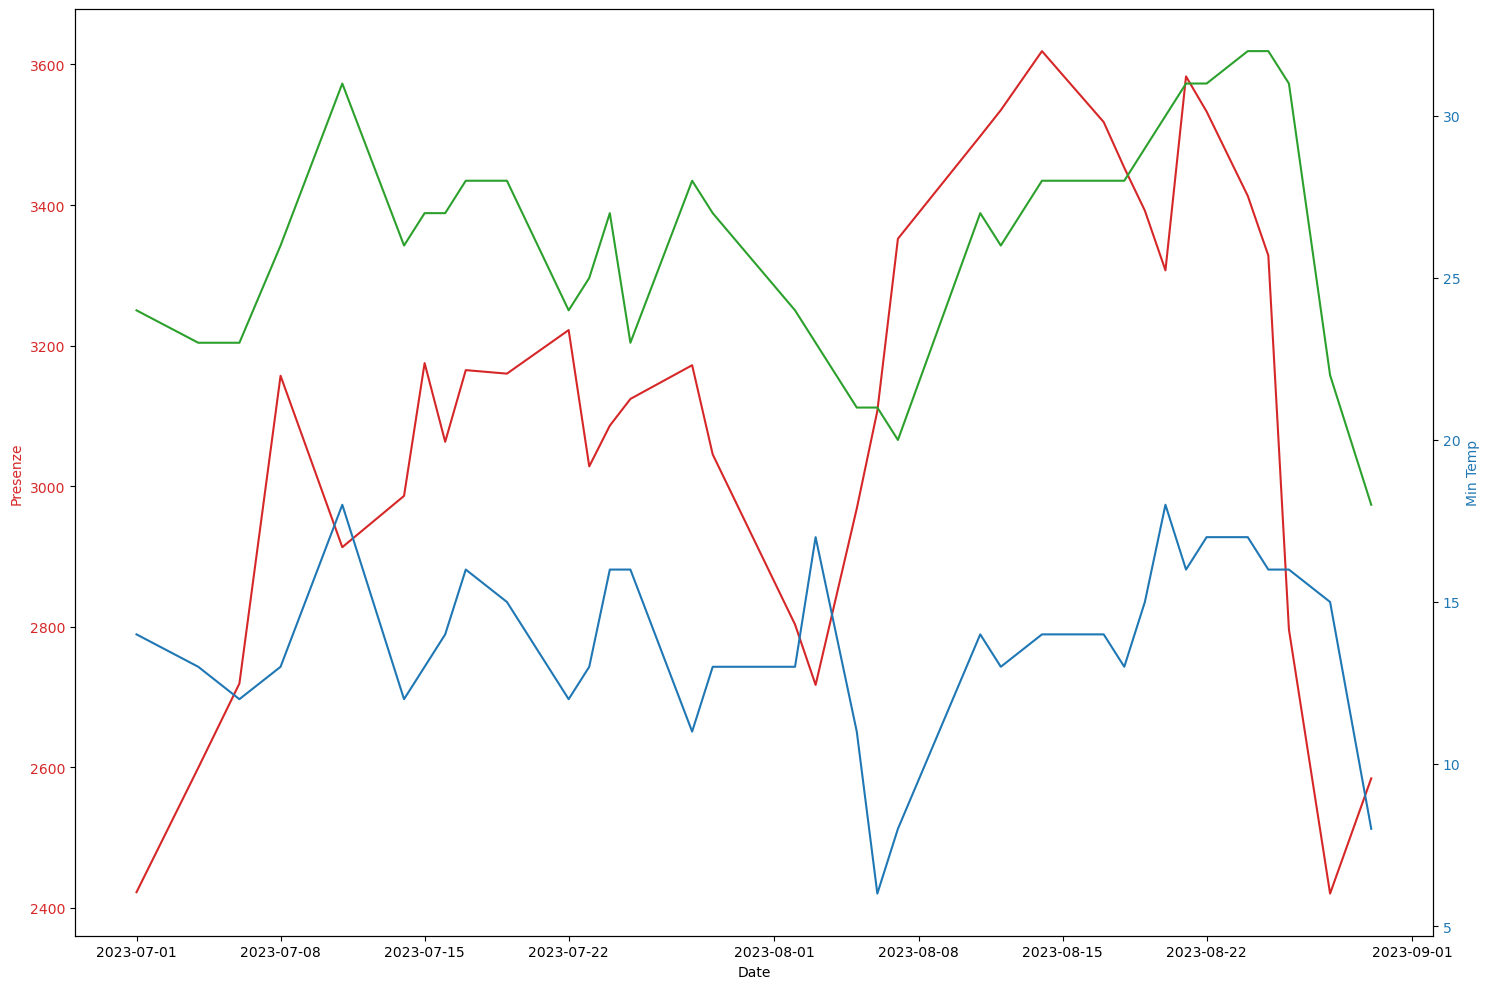

In [86]:
time_frame = date_timeframe
data_presenze = presenze
data_tmin = meteo_timeframe_df["tmin"]
data_tmax = meteo_timeframe_df["tmax"]

fig, ax1 = plt.subplots(figsize=(15, 10))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Presenze', color=color)
presenze_line = ax1.plot(time_frame, data_presenze, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Max Temp', color=color)  
max_temp_line = ax2.plot(time_frame, data_tmax, color=color)
ax2.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2.set_ylabel('Min Temp', color=color) 
min_temp_line = ax2.plot(time_frame, data_tmin, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

# Correlations between presenze vodafone e movimento turistico Molveno 

In [87]:
attendances_timeframe_df

,date,locType,locId,userCountry,userProfile,userCluster,value,year,month,day
2980720,2023-07-01,TN_MKT_AM_22,105,ALB,TOURIST,None,137,2023,7,1
2980726,2023-07-01,TN_MKT_AM_22,105,AUT,TOURIST,A,180,2023,7,1
2980727,2023-07-01,TN_MKT_AM_22,105,AUT,VISITOR,A,119,2023,7,1
2980728,2023-07-01,TN_MKT_AM_22,105,BEL,TOURIST,B,43,2023,7,1
2980739,2023-07-01,TN_MKT_AM_22,105,CHE,TOURIST,CH,43,2023,7,1
...,...,...,...,...,...,...,...,...,...,...
3429070,2023-08-31,TN_MKT_AM_22,105,ROU,VISITOR,UE,72,2023,8,31
3429076,2023-08-31,TN_MKT_AM_22,105,SRB,TOURIST,UE,29,2023,8,31
3429080,2023-08-31,TN_MKT_AM_22,105,SVN,TOURIST,UE,22,2023,8,31
3429082,2023-08-31,TN_MKT_AM_22,105,SWE,TOURIST,UE,22,2023,8,31


In [88]:
movimento_turistico_timeframe

,anno,mese,date,territorio_comunale,arrivi,presenze
546,2023,07,2023-07-01,MOLVENO,1175,2422
547,2023,07,2023-07-02,MOLVENO,741,2307
548,2023,07,2023-07-03,MOLVENO,531,2521
549,2023,07,2023-07-04,MOLVENO,294,2599
550,2023,07,2023-07-05,MOLVENO,379,2668
...,...,...,...,...,...,...
603,2023,08,2023-08-27,MOLVENO,730,2370
604,2023,08,2023-08-28,MOLVENO,394,2420
605,2023,08,2023-08-29,MOLVENO,301,2463
606,2023,08,2023-08-30,MOLVENO,464,2584


In [89]:
vodafone_str = attendances_str_timeframe_df.drop(columns=['locType','locId','userCountry','userProfile','userCluster']).groupby('date').sum().reset_index().rename(columns={'value':'vodafone'})
vodafone_str

,date,vodafone,year,month,day
0,2023-07-01,314081,778855,2695,385
1,2023-07-02,305374,768740,2660,760
2,2023-07-03,284500,786947,2723,1167
3,2023-07-04,283417,774809,2681,1532
4,2023-07-05,291015,780878,2702,1930
...,...,...,...,...,...
57,2023-08-27,314970,815269,3224,10881
58,2023-08-28,241108,793016,3136,10976
59,2023-08-29,251460,799085,3160,11455
60,2023-08-30,267571,797062,3152,11820


In [90]:
vodafone = attendances_timeframe_df.set_index("date")[["value"]]
vodafone

,value
date,
2023-07-01,137
2023-07-01,180
2023-07-01,119
2023-07-01,43
2023-07-01,43
...,...
2023-08-31,72
2023-08-31,29
2023-08-31,22


In [91]:
movimento_turisti = movimento_turistico_timeframe.set_index("date")[["arrivi", "presenze"]]
movimento_turisti

,arrivi,presenze
date,,
2023-07-01,1175,2422
2023-07-02,741,2307
2023-07-03,531,2521
2023-07-04,294,2599
2023-07-05,379,2668
...,...,...
2023-08-27,730,2370
2023-08-28,394,2420
2023-08-29,301,2463


In [92]:
all_dataset = pd.concat([vodafone, movimento_turisti], axis=1)
correlations = all_dataset.corr()
correlations#.style.background_gradient(cmap ='coolwarm') 

,value,arrivi,presenze
value,1.000000,-0.001738,0.009927
arrivi,-0.001738,1.000000,0.060408
presenze,0.009927,0.060408,1.000000


# Questions
    
